In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [67]:
df = pd.read_json("logins.json")
df.head(20)

login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21
5  1970-01-01 20:21:41
6  1970-01-01 20:12:16
7  1970-01-01 20:35:47
8  1970-01-01 20:35:38
9  1970-01-01 20:47:52
10 1970-01-01 20:26:05
11 1970-01-01 20:31:03
12 1970-01-01 20:34:46
13 1970-01-01 20:36:34
14 1970-01-01 20:39:25
15 1970-01-01 20:40:37
16 1970-01-01 20:34:58
17 1970-01-01 20:43:59
18 1970-01-01 20:47:46
19 1970-01-01 20:46:34

In [68]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [69]:
df.isna().sum()

login_time    0
dtype: int64

In [70]:
df.describe()

/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_34024/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


login_time
count                 93142
unique                92265
top     1970-03-17 01:01:39
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [72]:
#Check for duplicate records
df.duplicated().sum()

877

In [73]:
#View the dupliated records
df.loc[df.duplicated(keep=False),].head(20)

login_time
347  1970-01-02 10:59:52
354  1970-01-02 10:59:52
427  1970-01-02 12:27:48
434  1970-01-02 12:27:48
503  1970-01-02 15:08:27
506  1970-01-02 15:08:27
521  1970-01-02 16:14:36
524  1970-01-02 16:14:36
669  1970-01-02 22:03:36
672  1970-01-02 22:11:16
675  1970-01-02 22:03:36
684  1970-01-02 22:11:16
702  1970-01-02 22:30:34
706  1970-01-02 22:30:34
709  1970-01-02 22:39:55
727  1970-01-02 22:39:55
803  1970-01-03 00:19:04
805  1970-01-03 00:19:04
1099 1970-01-03 05:10:59
1104 1970-01-03 05:10:59

Interesting that we have duplicated records, where users have logged in at the same time, in this case our data doesn't have unique identifiers to the login user, so we will aggregate them along with the others based on time stamp alone every 15 minutes.

In [74]:
#First let's reset the index and set it as the timestamp that we have here in the data
df = df.reset_index()
df.drop('index', axis= 1, inplace=True)
df = df.set_index("login_time")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [76]:
#Next let's add an aggregation of the counts for each timestamp login
df['agg_count'] = 1
df.head(10)

agg_count
login_time                    
1970-01-01 20:13:18          1
1970-01-01 20:16:10          1
1970-01-01 20:16:37          1
1970-01-01 20:16:36          1
1970-01-01 20:26:21          1
1970-01-01 20:21:41          1
1970-01-01 20:12:16          1
1970-01-01 20:35:47          1
1970-01-01 20:35:38          1
1970-01-01 20:47:52          1

Based on this article https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0  we can do a resampling of this dataframe to get the aggregated counts based on the interval in the assignment (in this case 15 minutes)

In [77]:
#Aggregate in 15 minute intervals
df = df.resample("15T").sum()
df.head()

agg_count
login_time                    
1970-01-01 20:00:00          2
1970-01-01 20:15:00          6
1970-01-01 20:30:00          9
1970-01-01 20:45:00          7
1970-01-01 21:00:00          1

Great we have aggregated the data on the counts of logins within 15 minutes let's see if we can plot this data and derive some meaningful insights

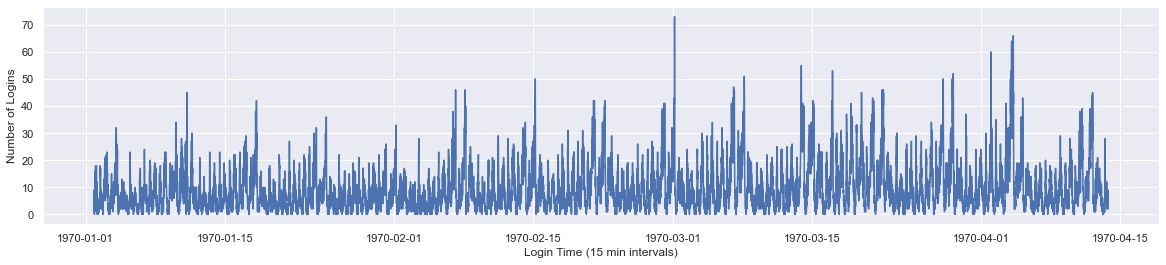

In [78]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df)
_ = plt.xlabel("Login Time (15 min intervals)")
_ = plt.ylabel("Number of Logins")
plt.show()

There appears to be a noticiable spike that occurs in intervals in the data maybe we can dive a little closer to see where exactly this occurs.

In [82]:
df_week = df.resample("W-MON").sum()

In [83]:
df_week.head()

agg_count
login_time           
1970-01-05       2833
1970-01-12       5294
1970-01-19       4956
1970-01-26       4744
1970-02-02       4881

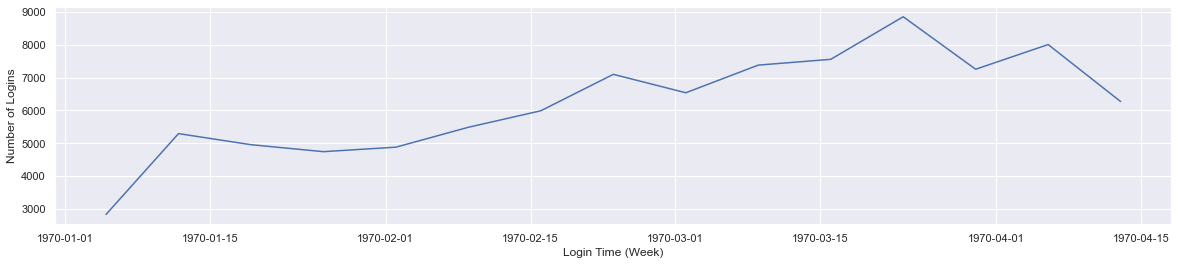

In [85]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df_week)
_ = plt.xlabel("Login Time (Week)")
_ = plt.ylabel("Number of Logins")
plt.show()

In [86]:
df_day = df.resample("1D").sum()
df_day.head()

agg_count
login_time           
1970-01-01        112
1970-01-02        681
1970-01-03        793
1970-01-04        788
1970-01-05        459

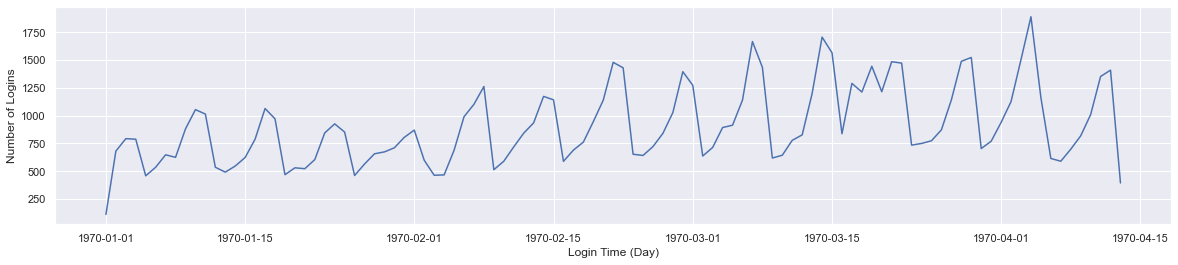

In [89]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df_day)
_ = plt.xlabel("Login Time (Day)")
_ = plt.ylabel("Number of Logins")
plt.show()

In [88]:
df_hour = df.resample("H").sum()

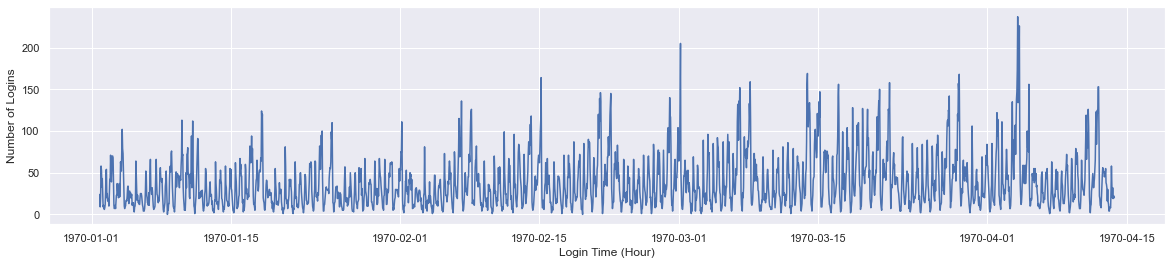

In [90]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df_hour)
_ = plt.xlabel("Login Time (Hour)")
_ = plt.ylabel("Number of Logins")
plt.show()

Interesting from a macro perspective there seems to be an uptick in logins that taper off in April. I curious if there was an event perhaps an online tournament that lasted for x amount of months that crescendowed beginning of April, then afterwards engagement with the platform began to taper off. However there does seem from a more micro perspective that there are spikes in logins for a given time especially when looking at it from an hour perspective. I'm curious to find out when these spikes happen during the week. Let's take the 15 minute interval from our initial problem and look at it from a slice of data for different days and see if we can discern a pattern in the data.

In [92]:
df_day_subset = df.loc['1970-01-01 00:00:00': '1970-01-01 23:59:59']
df_day_subset.shape

(16, 1)

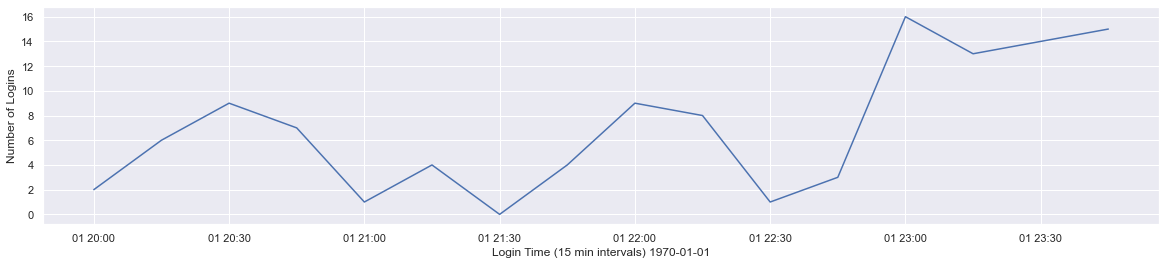

In [94]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df_day_subset)
_ = plt.xlabel("Login Time (15 min intervals) 1970-01-01")
_ = plt.ylabel("Number of Logins")
plt.show()

In [95]:
df_day_subset = df.loc['1970-01-04 00:00:00': '1970-01-04 23:59:59']
df_day_subset.shape

(96, 1)

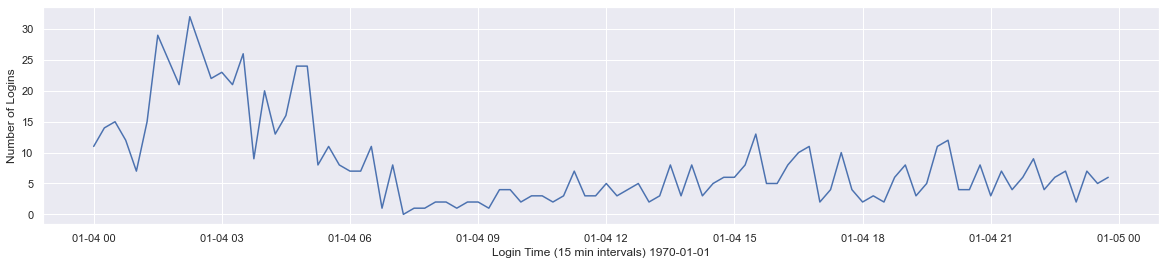

In [96]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df_day_subset)
_ = plt.xlabel("Login Time (15 min intervals) 1970-01-01")
_ = plt.ylabel("Number of Logins")
plt.show()

In [97]:
df_day_subset = df.loc['1970-02-01 00:00:00': '1970-02-01 23:59:59']
df_day_subset.shape

(96, 1)

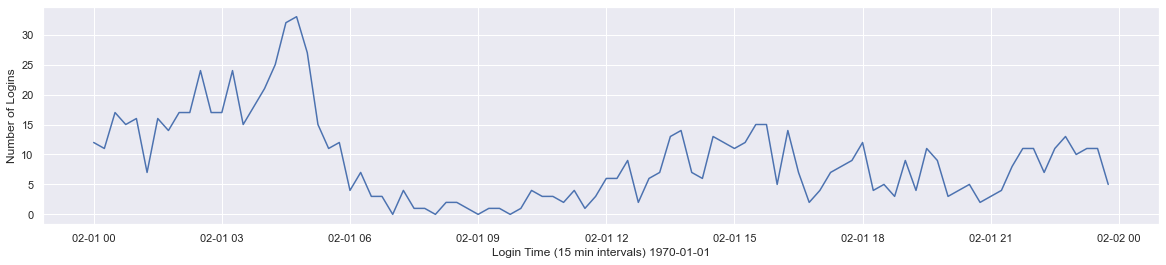

In [98]:
_ = plt.figure(figsize=(20, 4))
_ = plt.plot(df_day_subset)
_ = plt.xlabel("Login Time (15 min intervals) 1970-01-01")
_ = plt.ylabel("Number of Logins")
plt.show()

Interesting it appears that our first day in our dataset is missing ours from the beginning the day up until about 8pm. I wonder what other days are missing a substantial amount of data. Our example dataset that doesn't appear to have any gaps looks to be February 1st we'll use that as our baseline to compare to the other days.

In [101]:
day_grouping_df = df.groupby(df.index.floor("d")).size().reset_index(name="num_records_per_day")

In [103]:
day_grouping_df.head(10)

login_time  num_records_per_day
0 1970-01-01                   16
1 1970-01-02                   96
2 1970-01-03                   96
3 1970-01-04                   96
4 1970-01-05                   96
5 1970-01-06                   96
6 1970-01-07                   96
7 1970-01-08                   96
8 1970-01-09                   96
9 1970-01-10                   96

In [105]:
day_grouping_df.loc[day_grouping_df['num_records_per_day'] < 96]

login_time  num_records_per_day
0   1970-01-01                   16
102 1970-04-13                   76

In [106]:
day_grouping_df.loc[day_grouping_df['num_records_per_day'] > 96]

Empty DataFrame
Columns: [login_time, num_records_per_day]
Index: []

In [107]:
day_grouping_df.shape

(103, 2)

Ok this confirms that the first day is an anamoly regarding the number of recoreds associated with that day, but not only that we also have our last record also being an anamoly missing some entries as well (though not as bad as the first day). We should expect in 15 minute intervals to have 96 entries (1 hour = 60 minutes -> 60/15 = 4 -> 4 * 24 = 96) Does this hinder our indentification of patterns throughout the days given the fifteen minute interval. Not so much as we can idenitify an overarching pattern of increasing amount of logins as time progresses until mid April. Let's merge the data (number of records) into our 15 minute interval data, this could be useful to us and in that it would provide us a little help in regards to how we can slice up the data to better view the daily trends.

In [120]:
day_grouping_df_new = day_grouping_df
day_grouping_df_new['day'] = day_grouping_df_new['login_time']

In [121]:
df_merged = pd.merge_asof(df, day_grouping_df_new[['login_time','num_records_per_day', 'day']], on='login_time', tolerance=pd.Timedelta('1d'))

In [122]:
df_merged

login_time  agg_count  num_records_per_day        day
0    1970-01-01 20:00:00          2                   16 1970-01-01
1    1970-01-01 20:15:00          6                   16 1970-01-01
2    1970-01-01 20:30:00          9                   16 1970-01-01
3    1970-01-01 20:45:00          7                   16 1970-01-01
4    1970-01-01 21:00:00          1                   16 1970-01-01
...                  ...        ...                  ...        ...
9783 1970-04-13 17:45:00          5                   76 1970-04-13
9784 1970-04-13 18:00:00          5                   76 1970-04-13
9785 1970-04-13 18:15:00          2                   76 1970-04-13
9786 1970-04-13 18:30:00          7                   76 1970-04-13
9787 1970-04-13 18:45:00          6                   76 1970-04-13

[9788 rows x 4 columns]

Next let's look at the data more closely regarding the daily trends. We'll 

In [123]:
#Get list of unique days for the graphs
unique_days = list(df_merged['day'].unique())

In [124]:
unique_days

[numpy.datetime64('1970-01-01T00:00:00.000000000'),
 numpy.datetime64('1970-01-02T00:00:00.000000000'),
 numpy.datetime64('1970-01-03T00:00:00.000000000'),
 numpy.datetime64('1970-01-04T00:00:00.000000000'),
 numpy.datetime64('1970-01-05T00:00:00.000000000'),
 numpy.datetime64('1970-01-06T00:00:00.000000000'),
 numpy.datetime64('1970-01-07T00:00:00.000000000'),
 numpy.datetime64('1970-01-08T00:00:00.000000000'),
 numpy.datetime64('1970-01-09T00:00:00.000000000'),
 numpy.datetime64('1970-01-10T00:00:00.000000000'),
 numpy.datetime64('1970-01-11T00:00:00.000000000'),
 numpy.datetime64('1970-01-12T00:00:00.000000000'),
 numpy.datetime64('1970-01-13T00:00:00.000000000'),
 numpy.datetime64('1970-01-14T00:00:00.000000000'),
 numpy.datetime64('1970-01-15T00:00:00.000000000'),
 numpy.datetime64('1970-01-16T00:00:00.000000000'),
 numpy.datetime64('1970-01-17T00:00:00.000000000'),
 numpy.datetime64('1970-01-18T00:00:00.000000000'),
 numpy.datetime64('1970-01-19T00:00:00.000000000'),
 numpy.datet

Interesting it appears halfway through the day we get

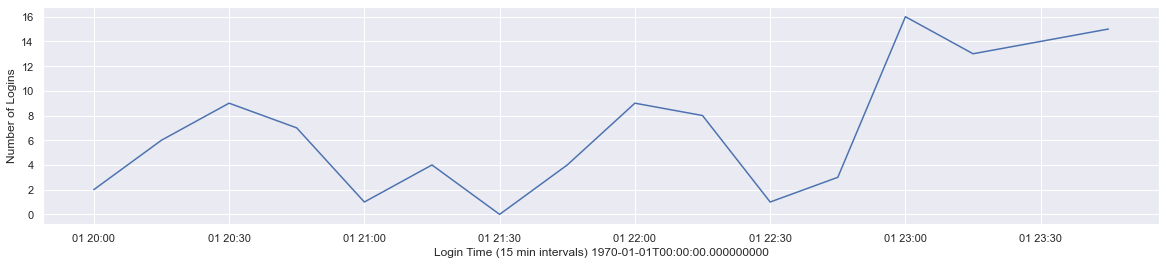

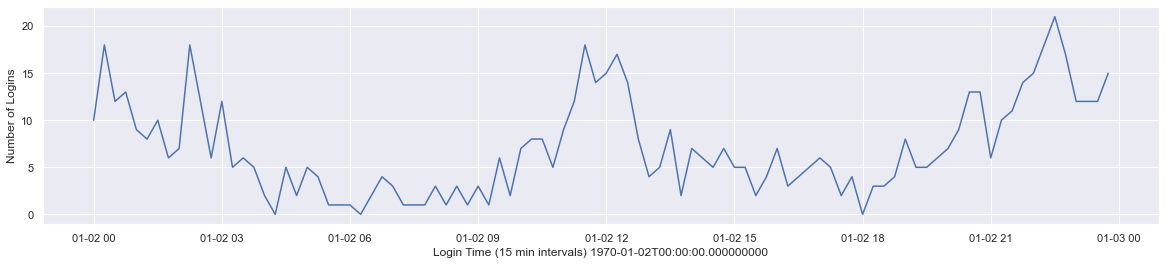

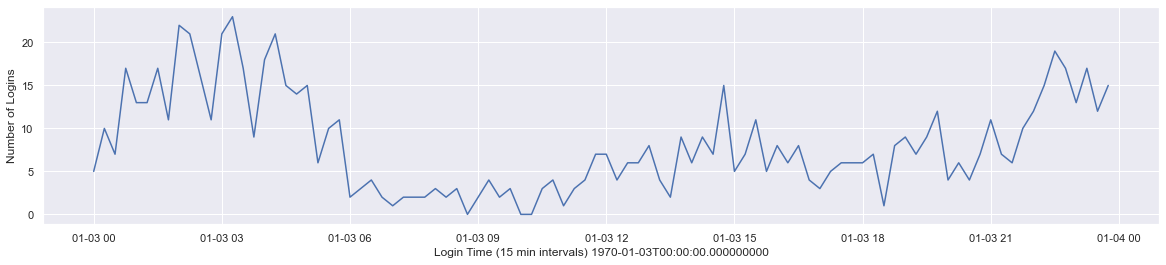

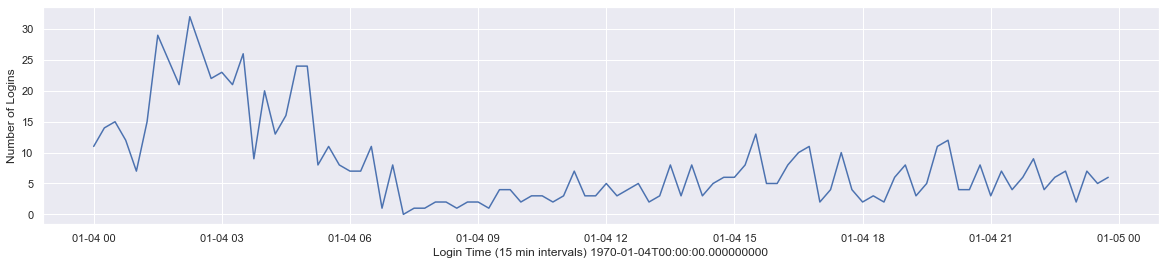

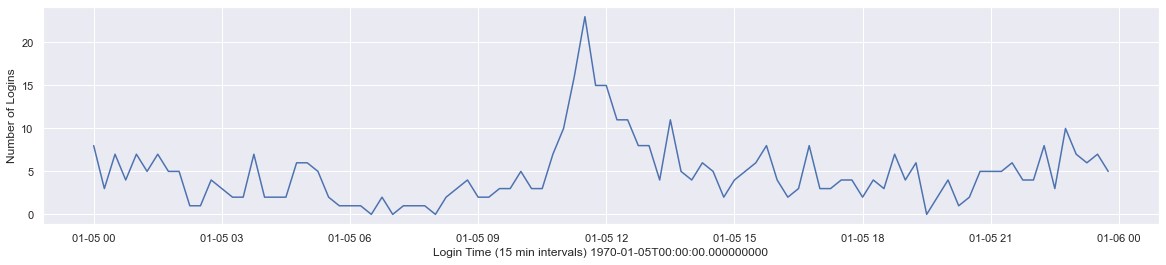

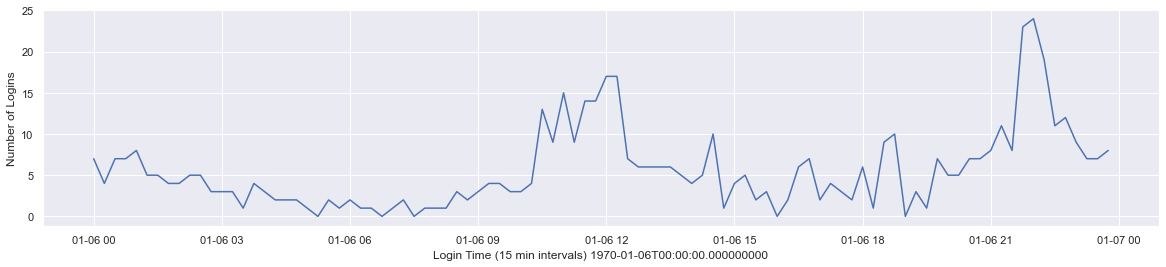

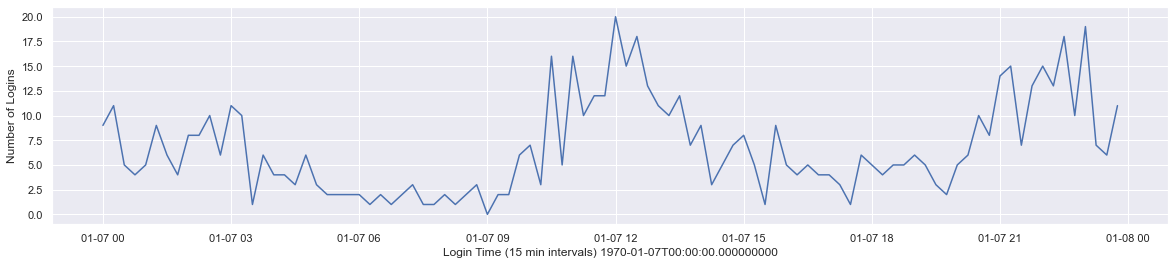

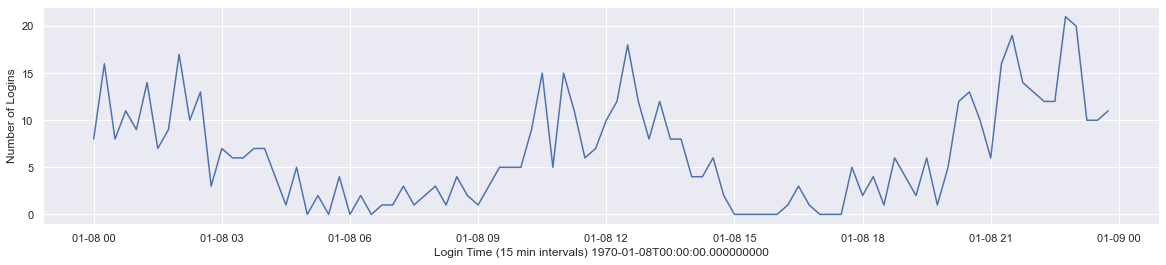

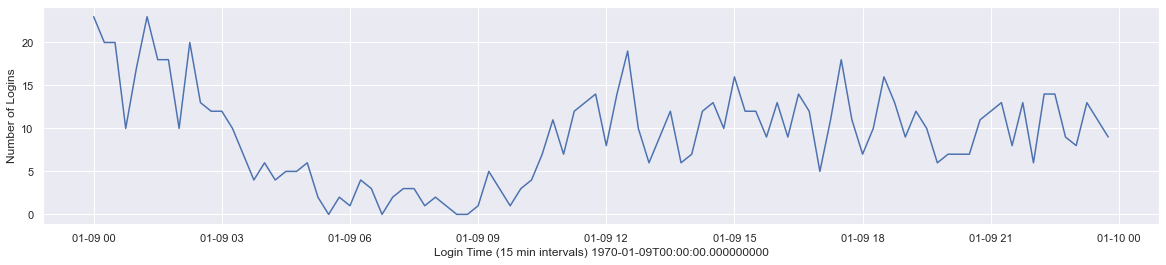

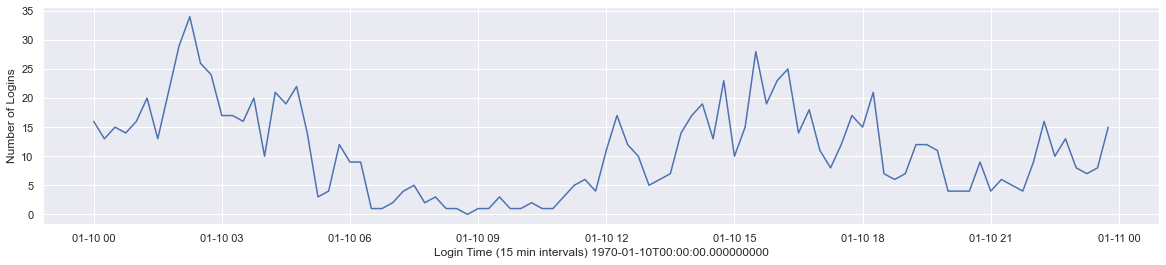

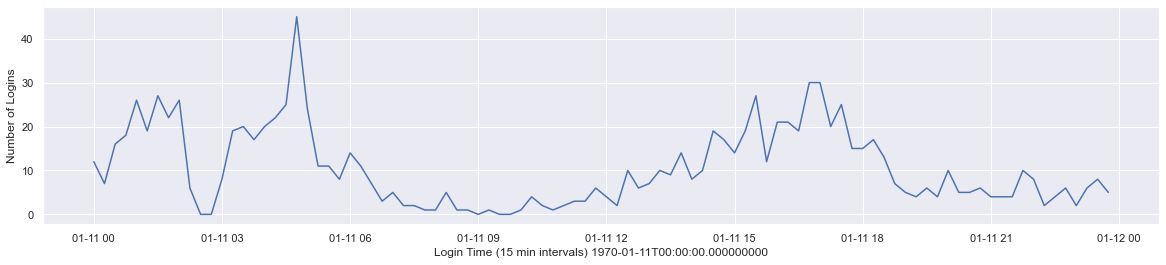

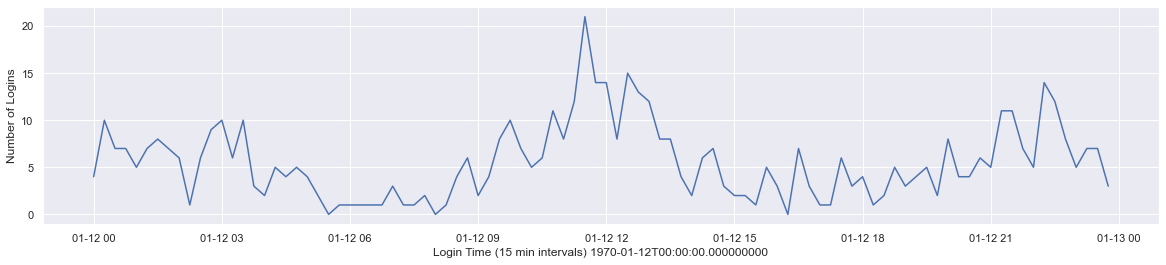

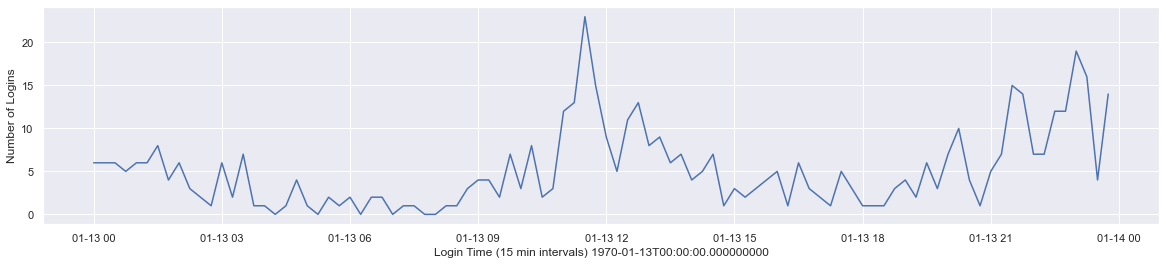

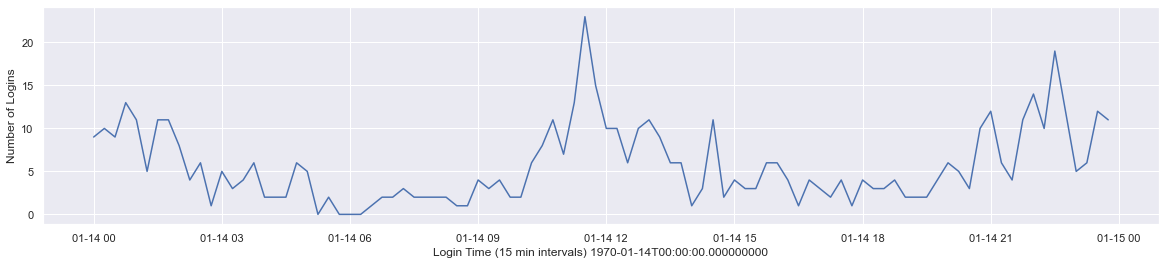

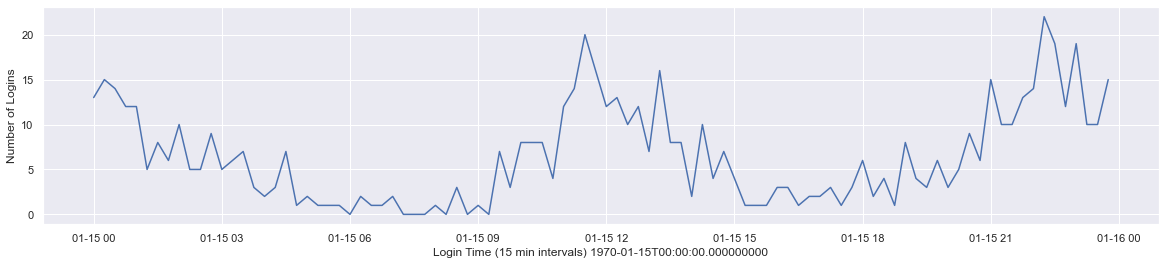

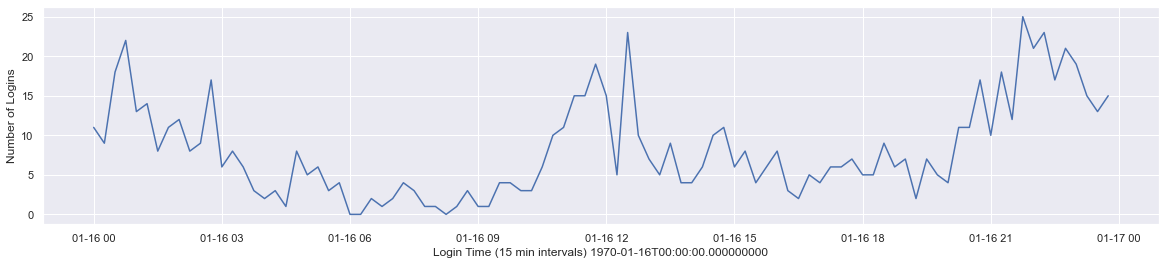

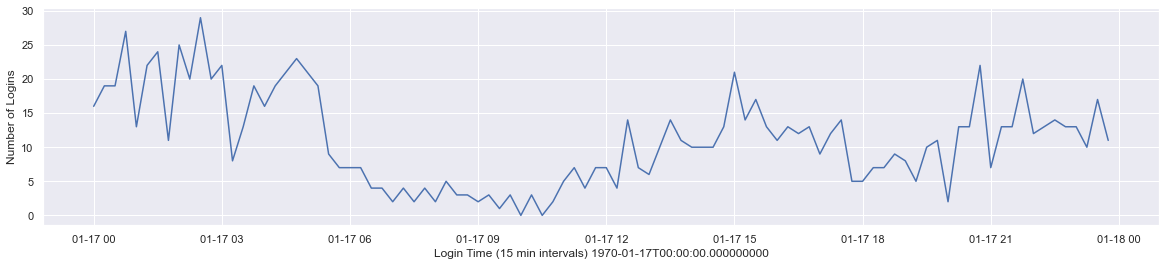

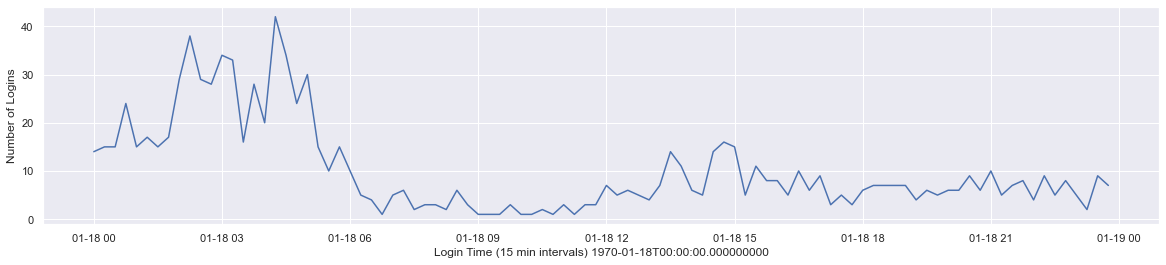

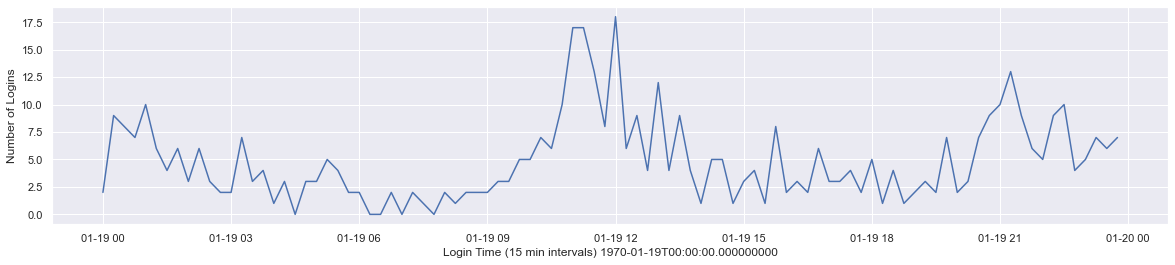

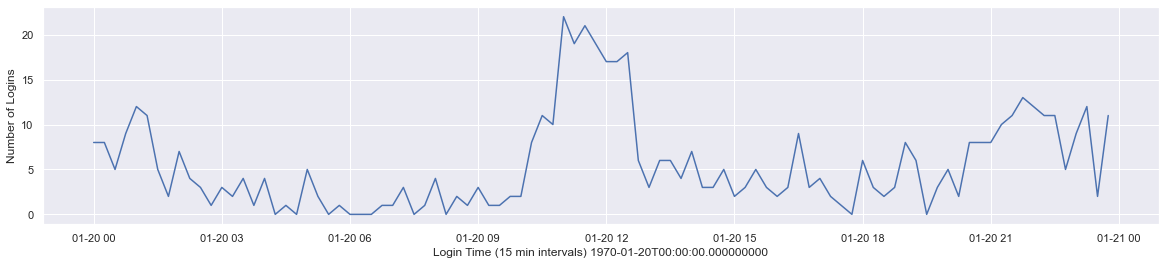

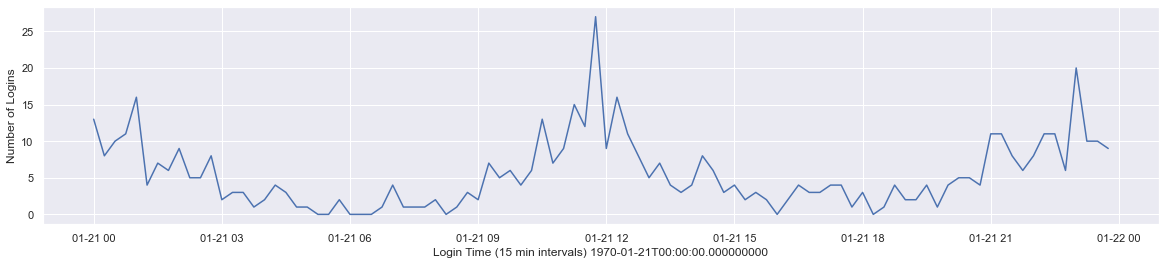

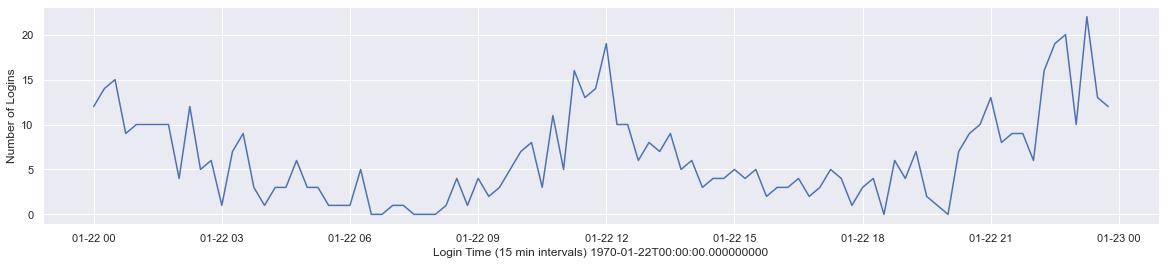

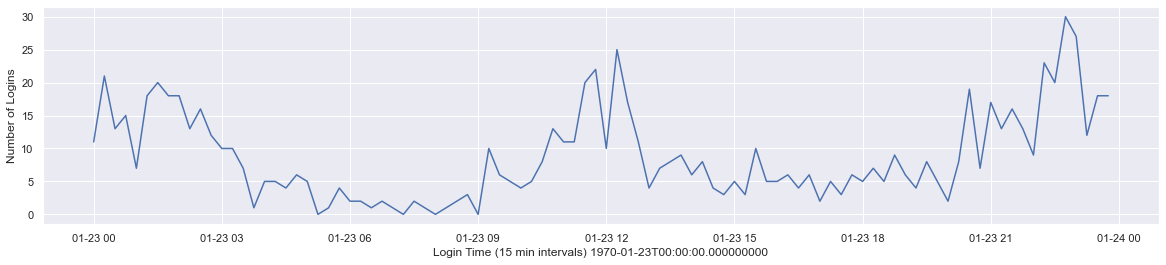

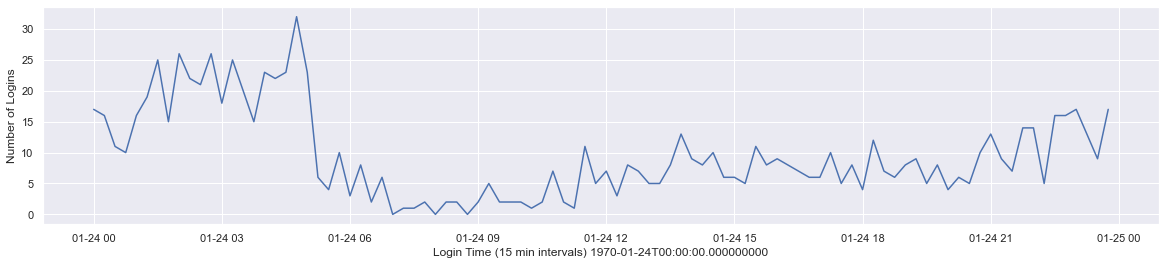

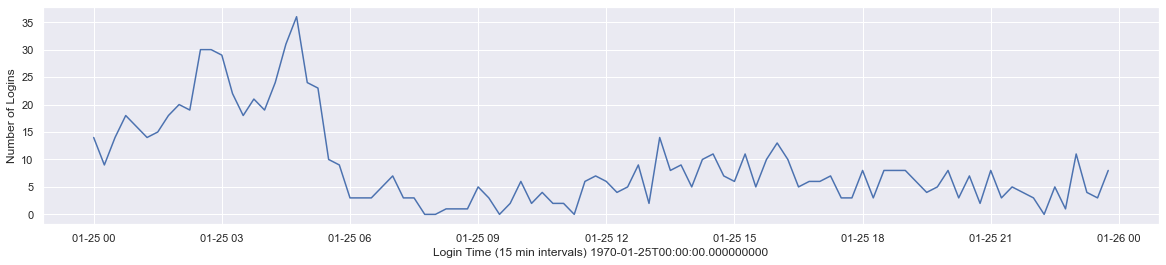

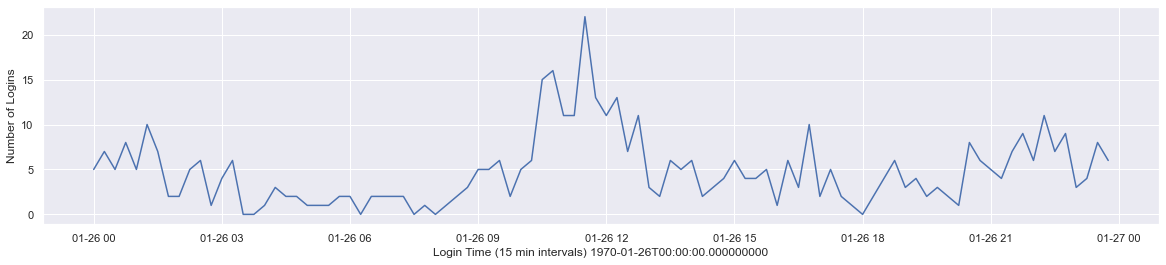

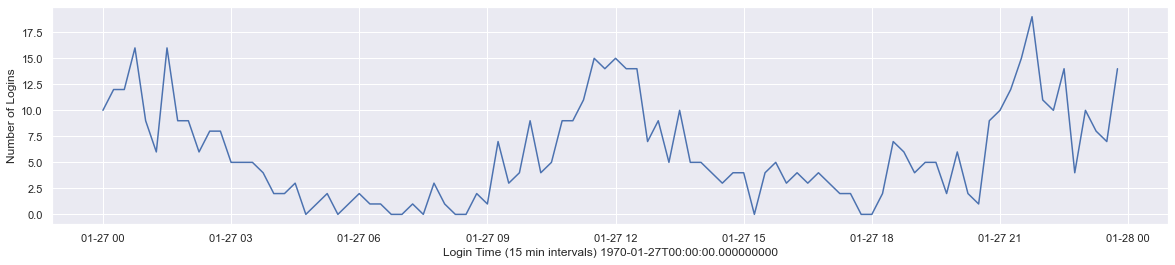

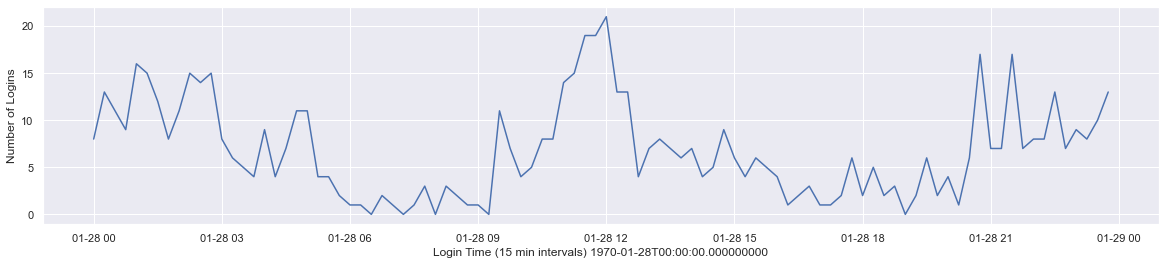

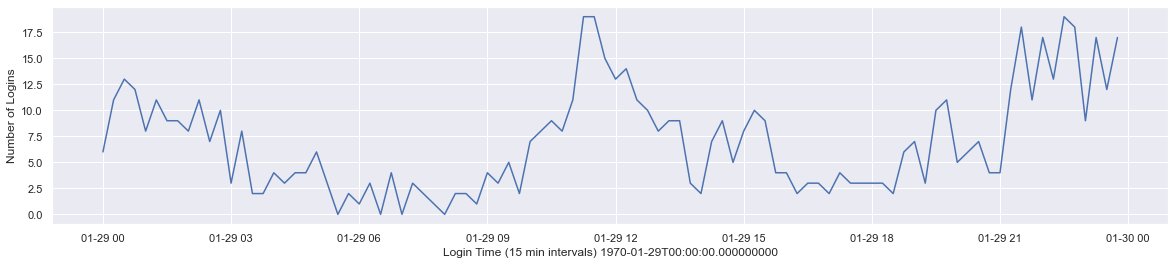

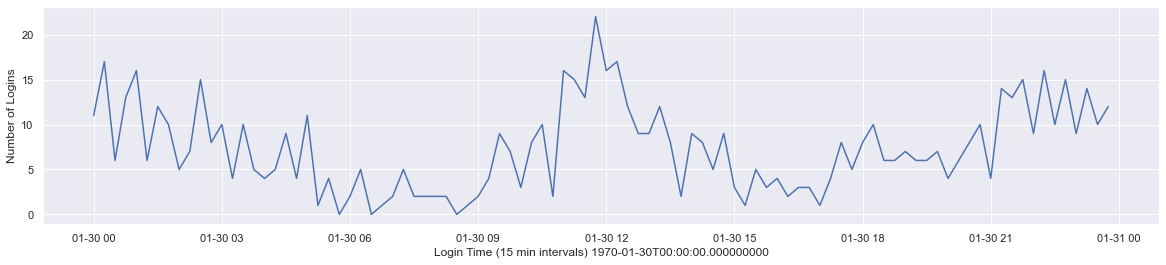

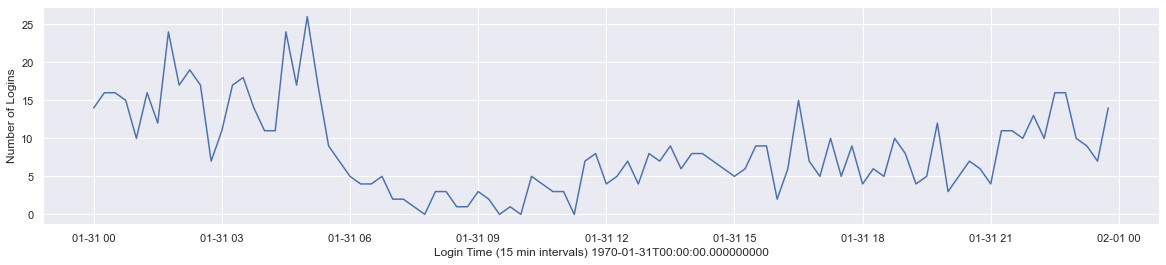

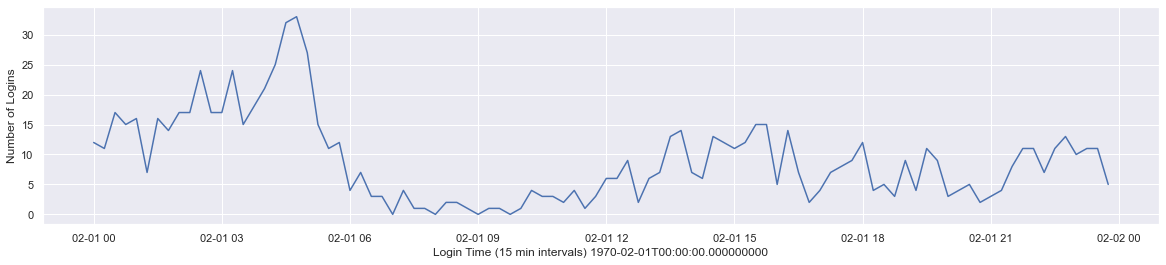

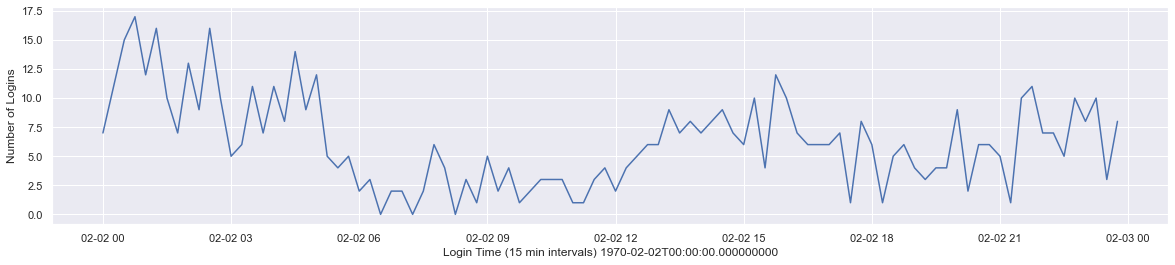

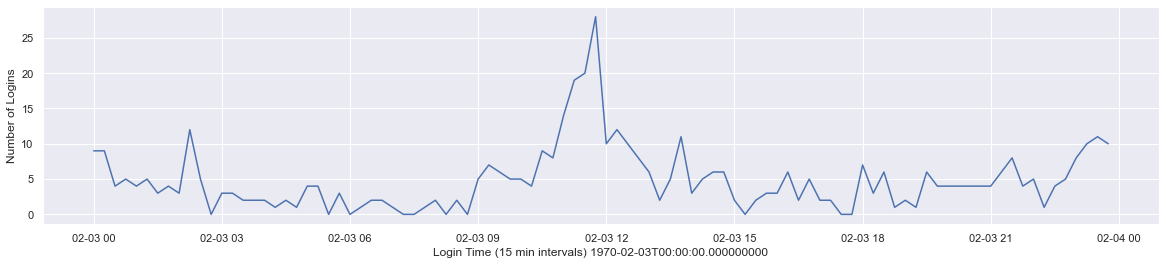

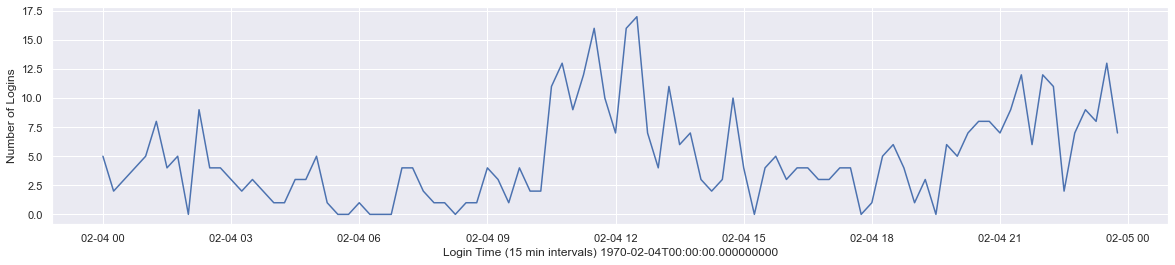

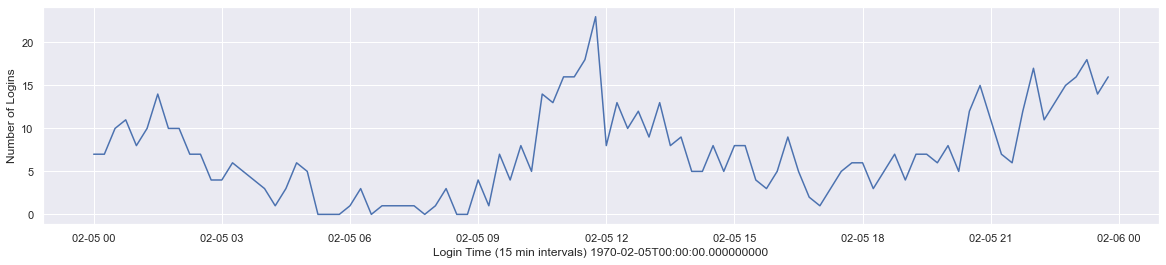

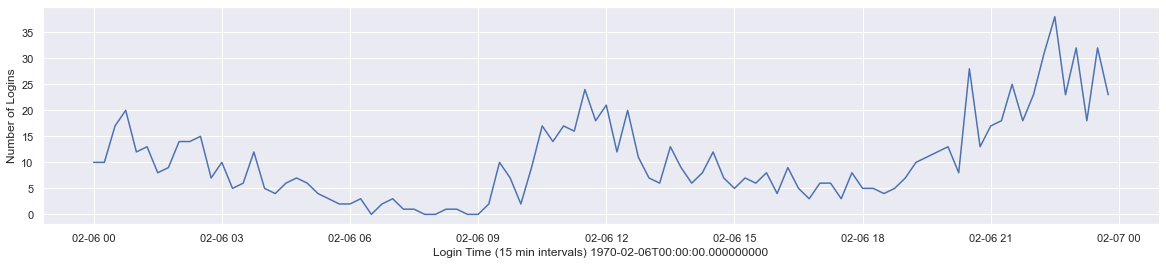

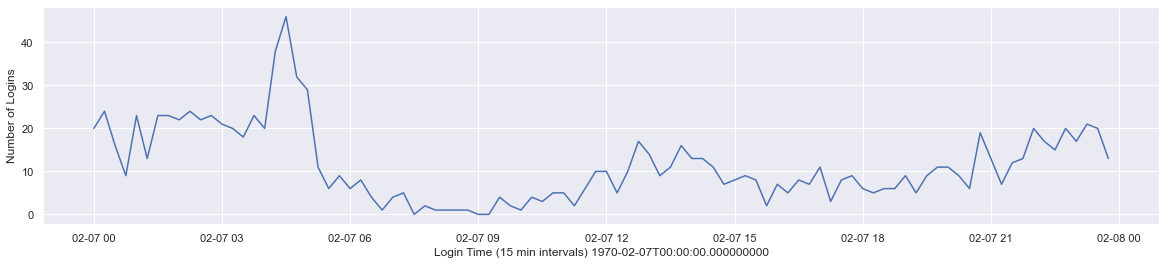

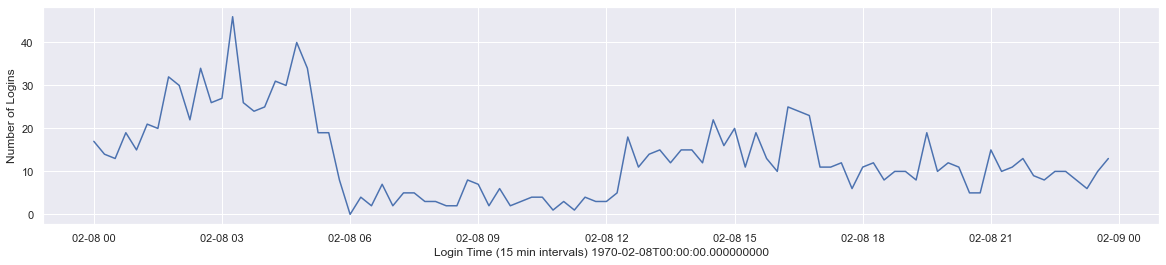

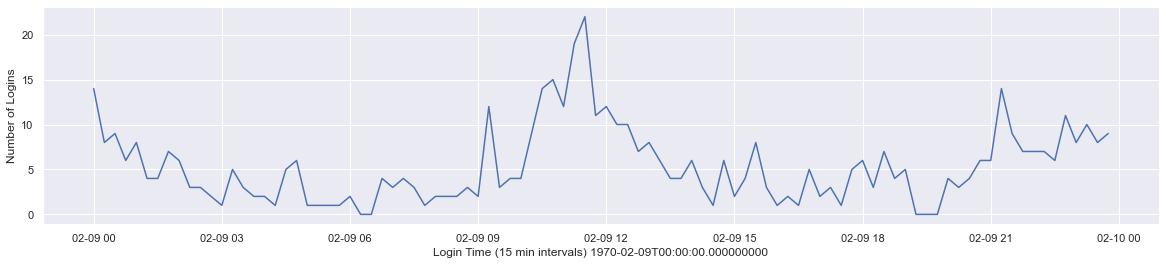

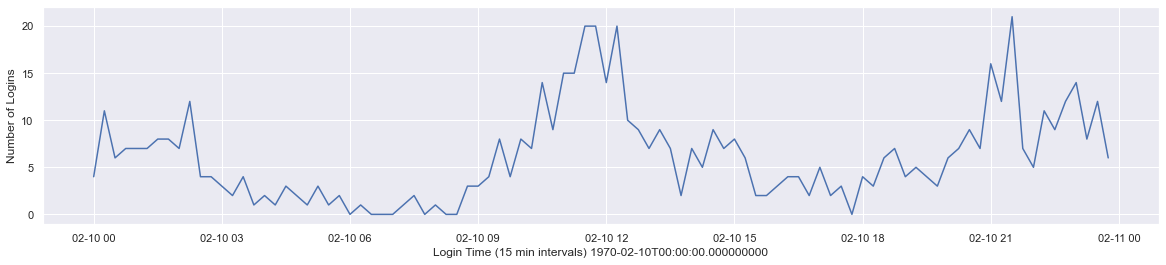

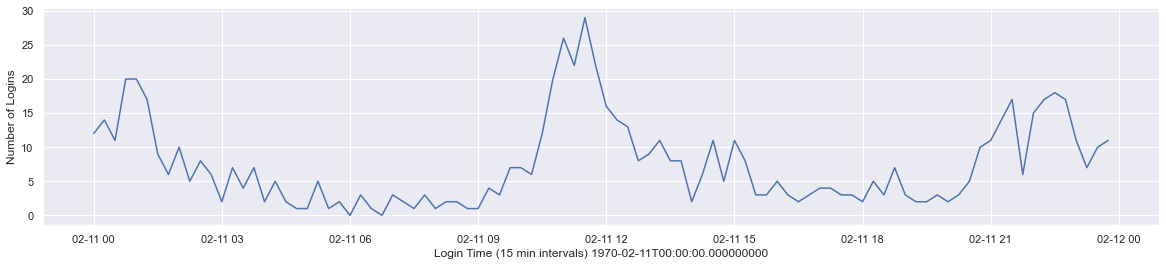

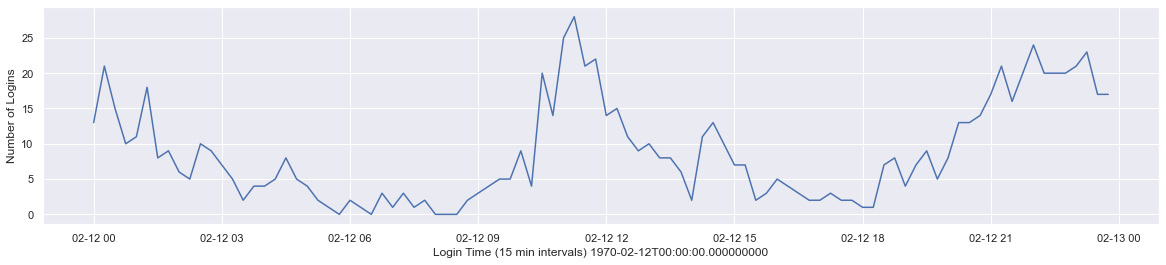

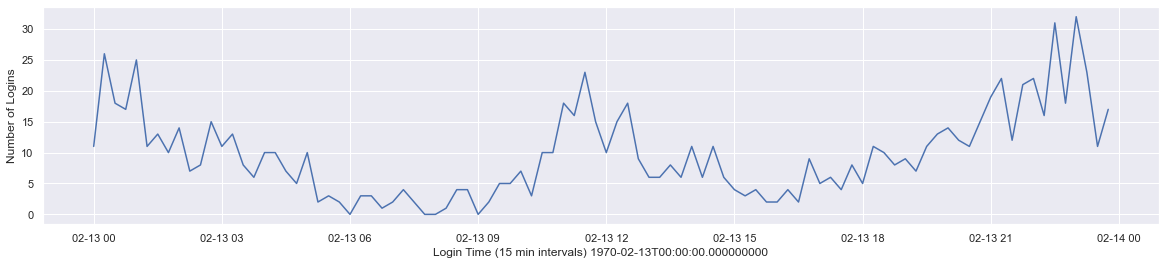

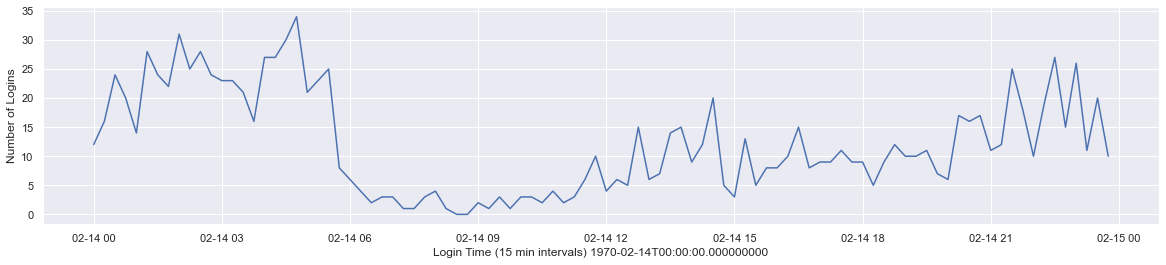

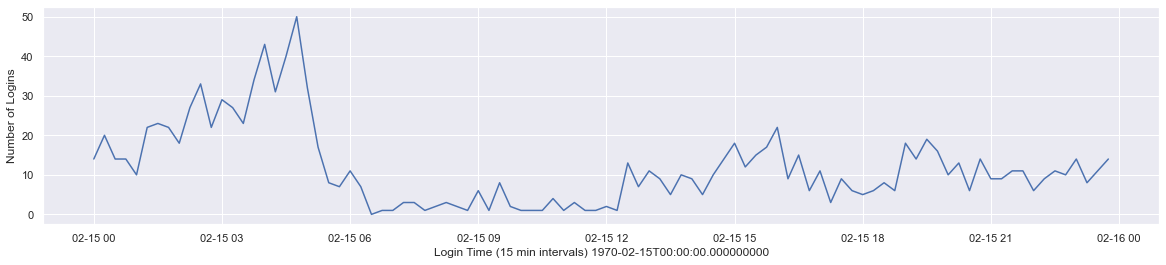

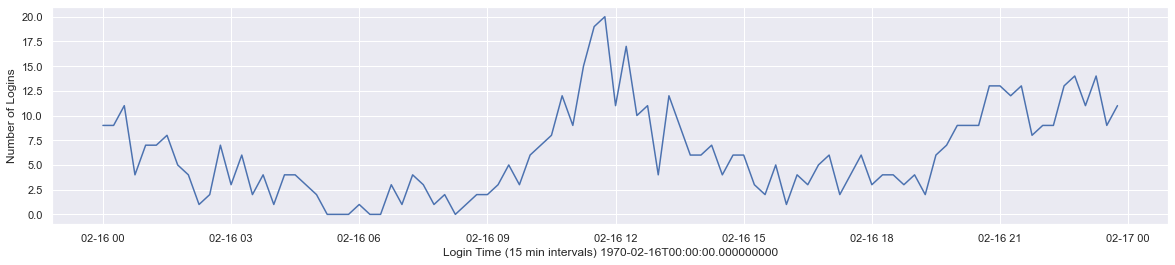

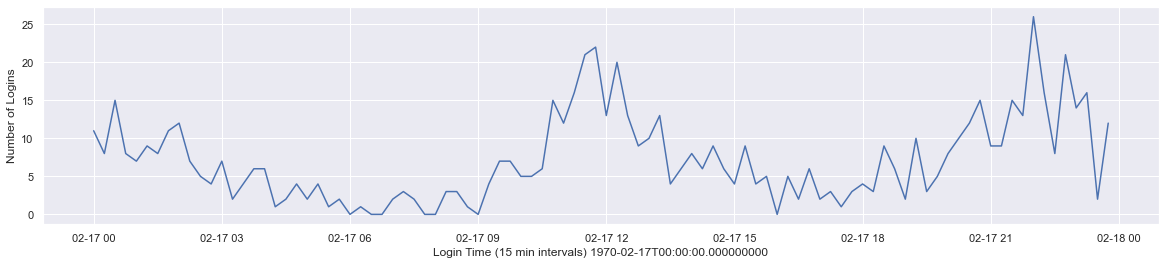

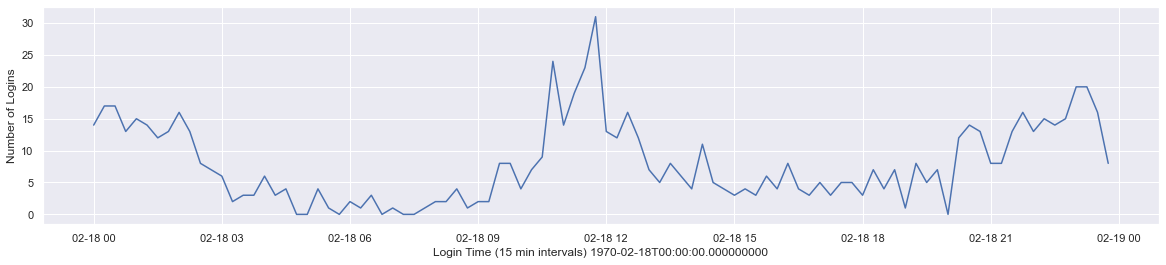

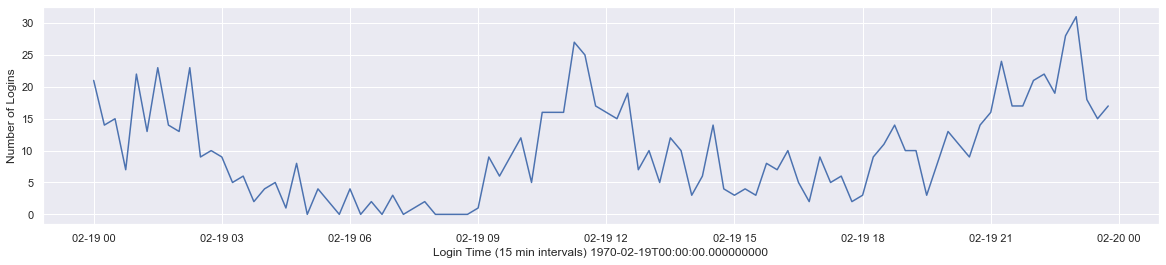

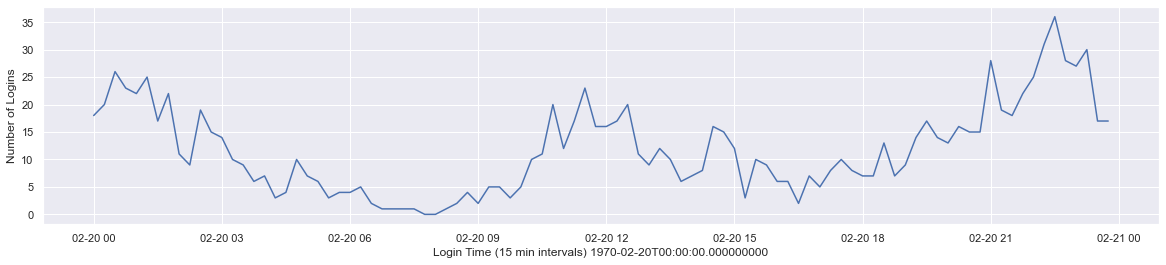

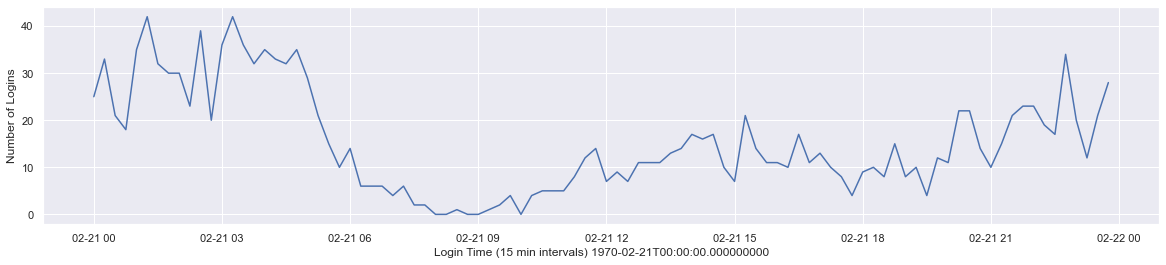

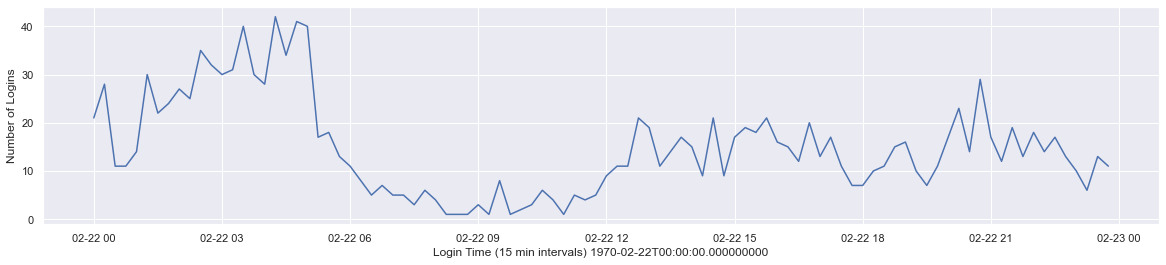

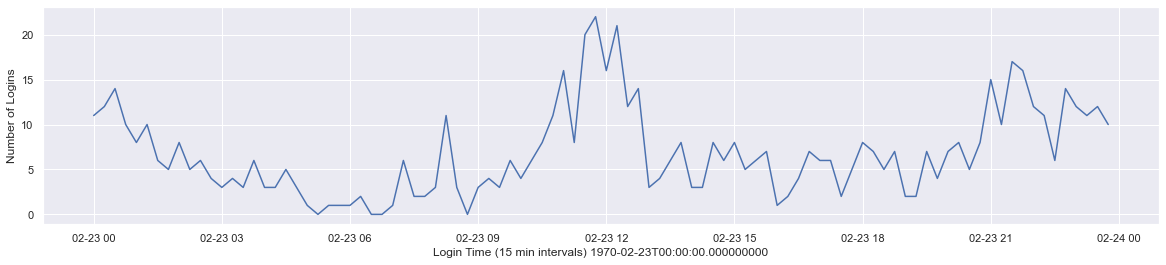

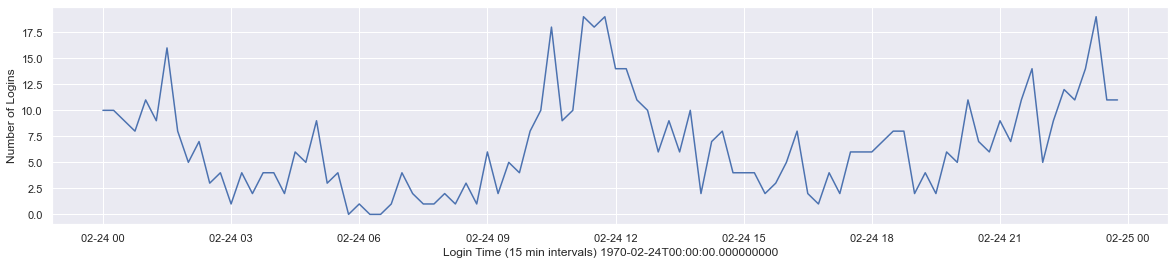

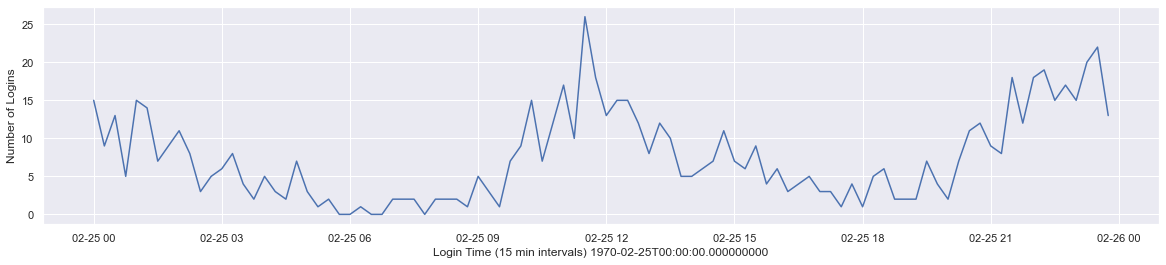

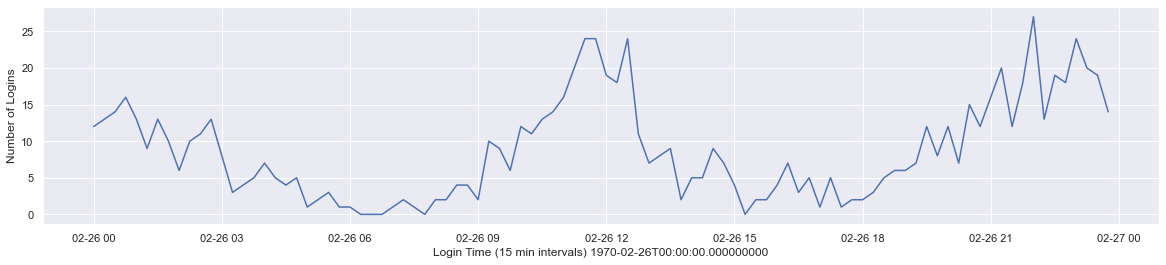

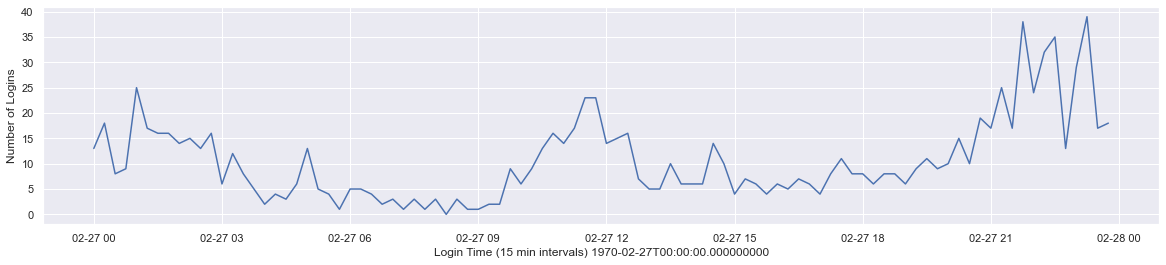

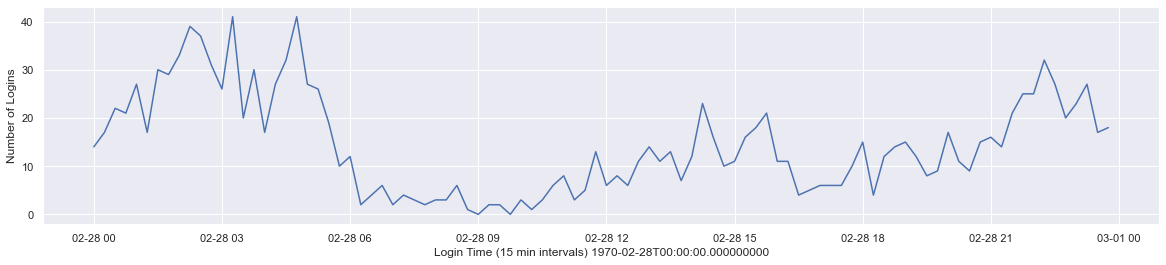

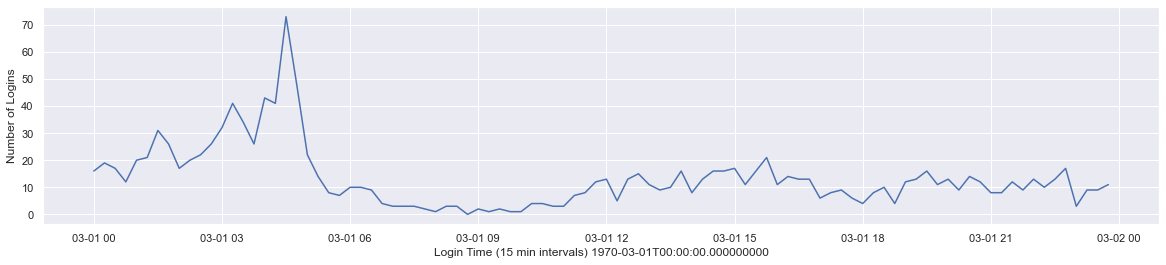

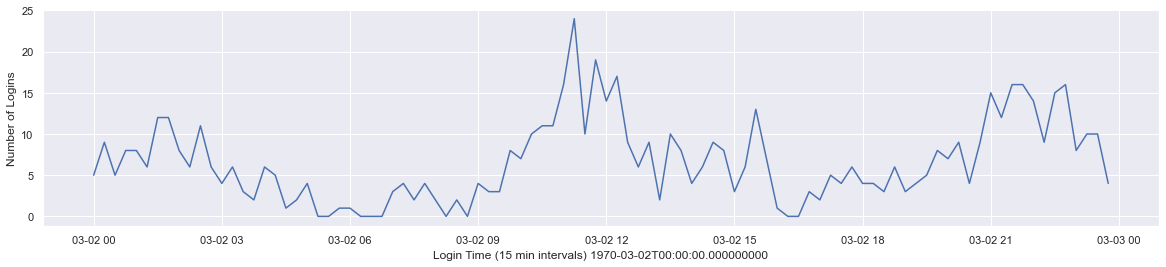

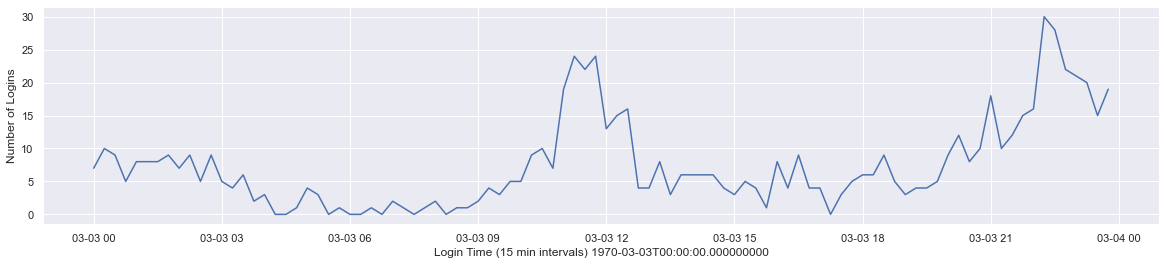

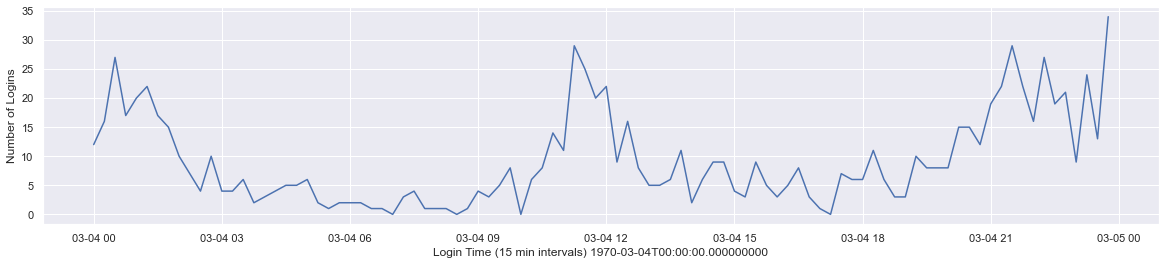

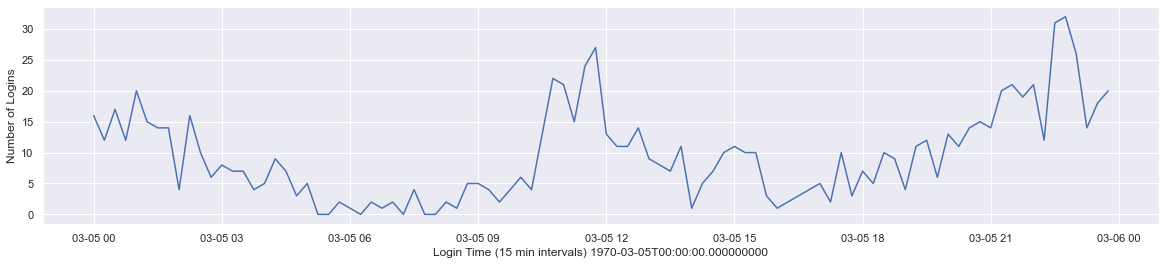

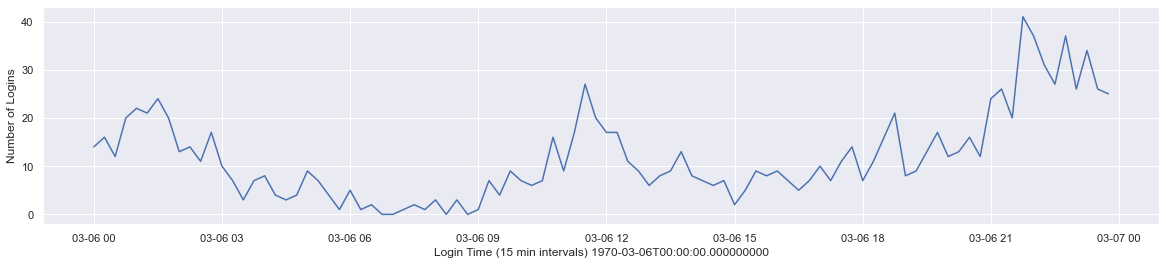

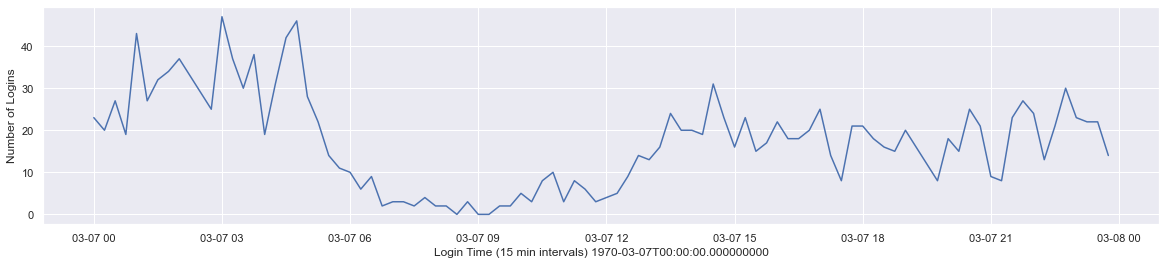

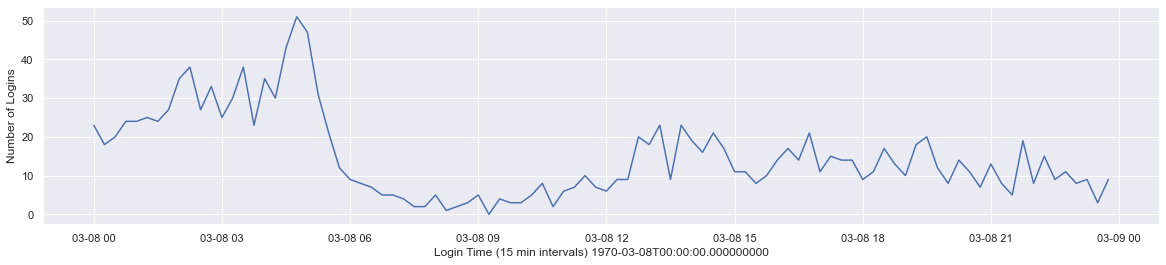

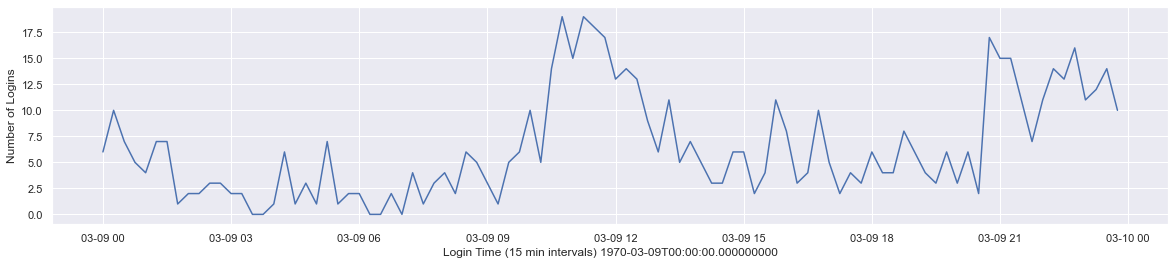

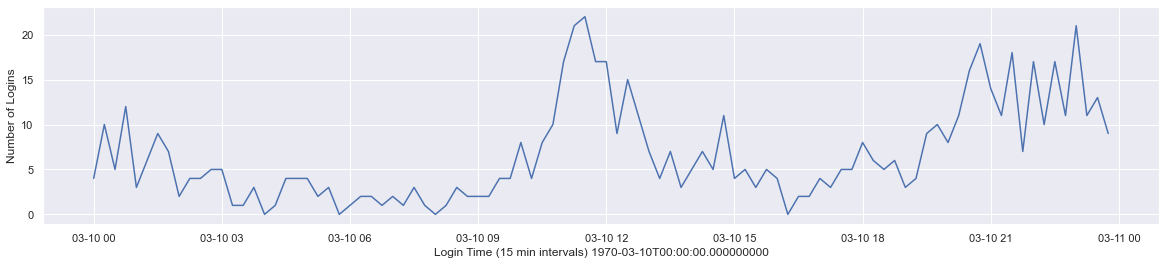

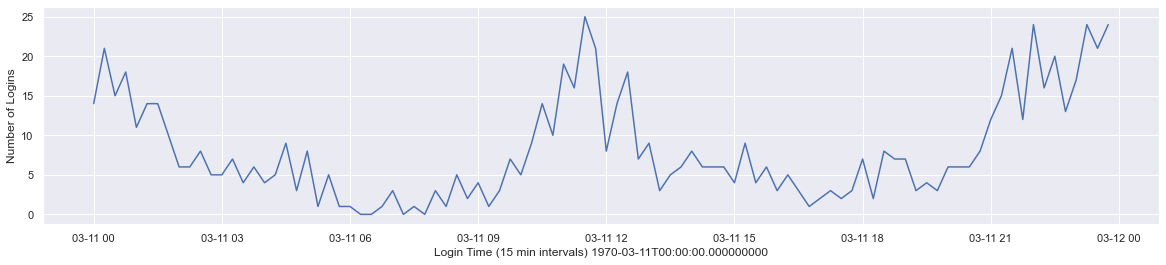

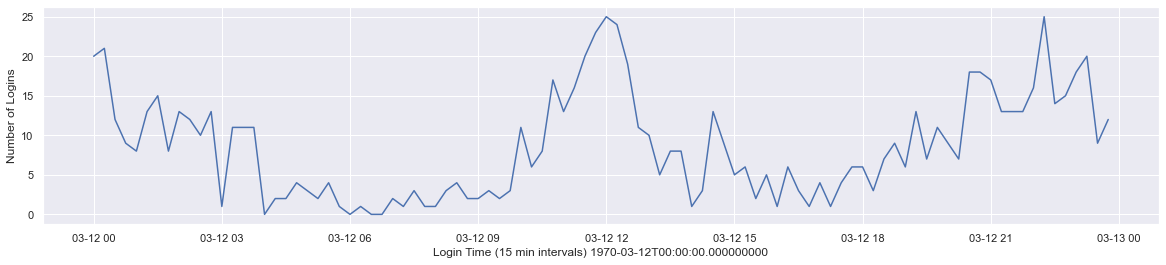

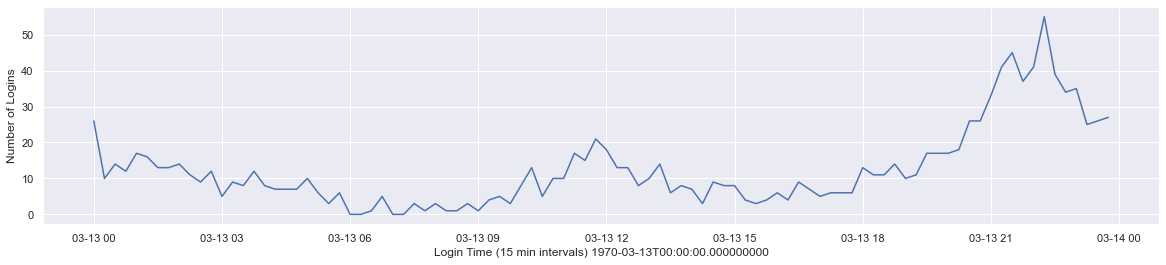

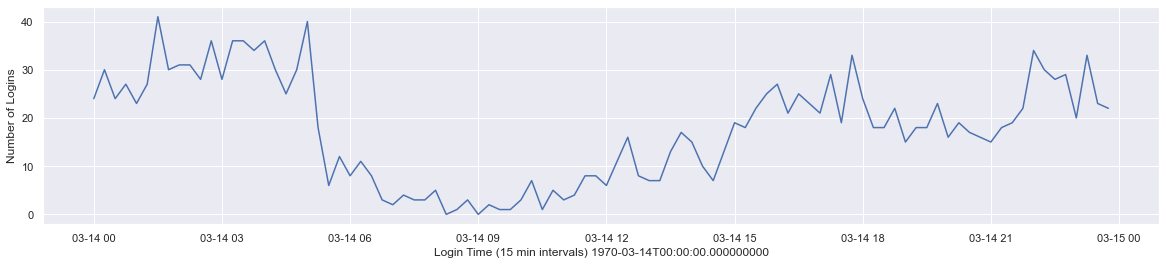

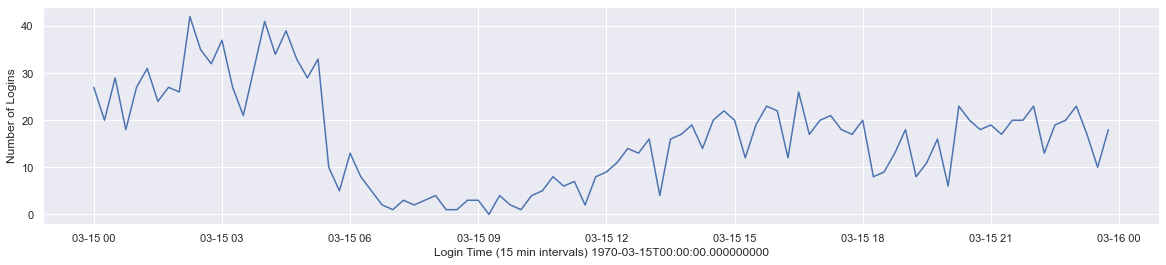

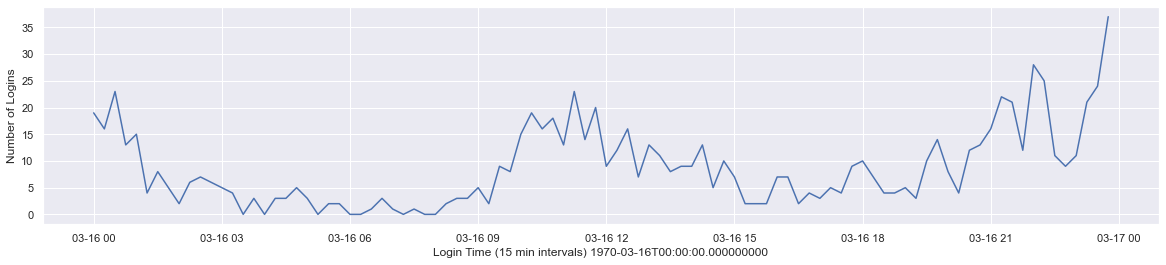

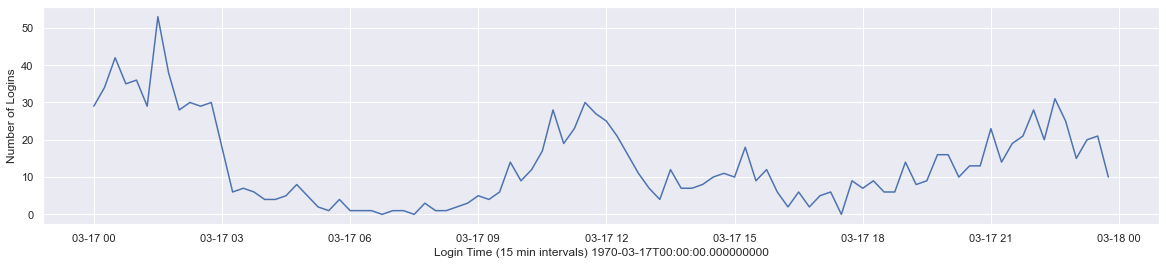

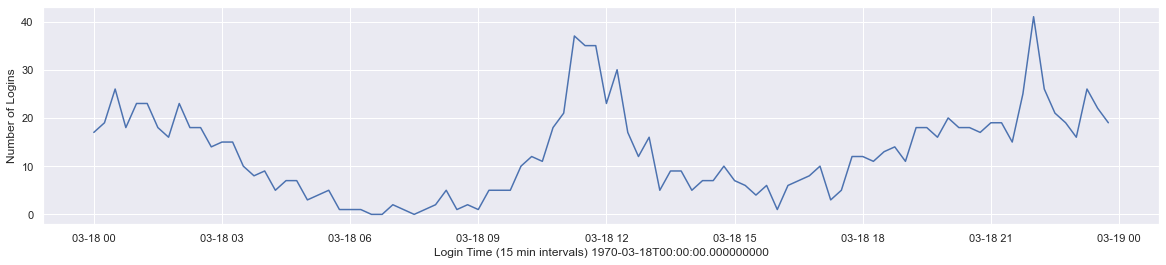

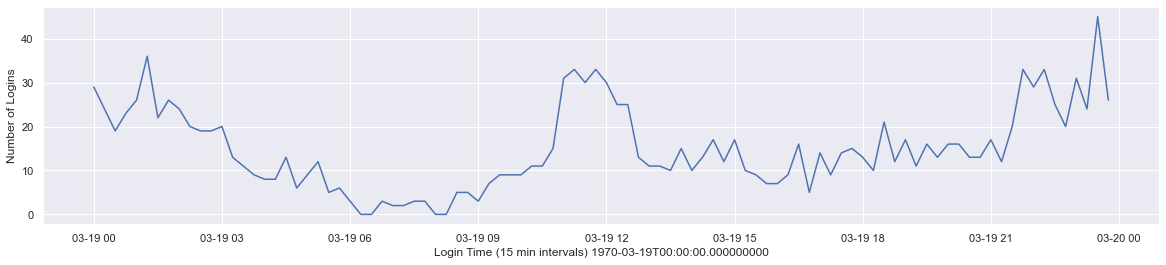

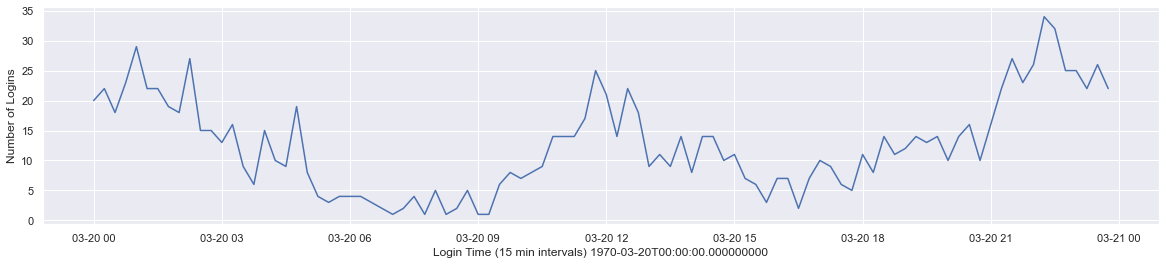

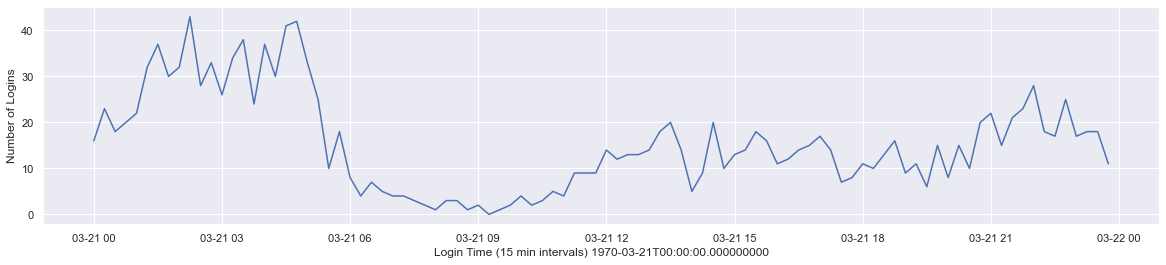

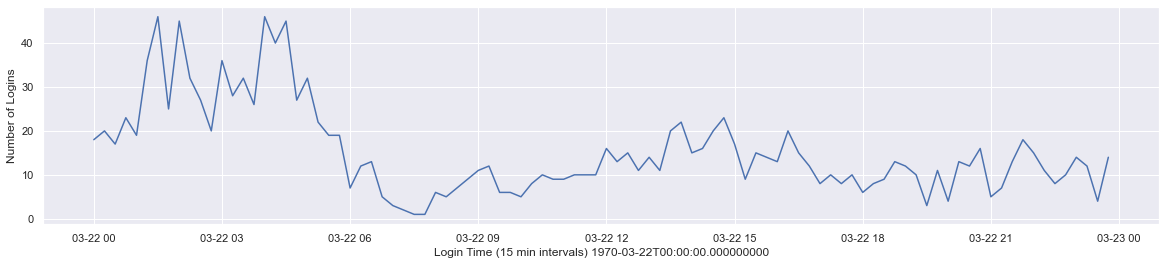

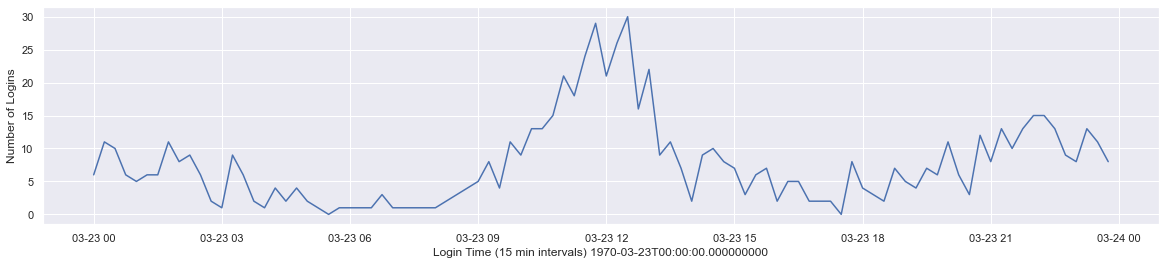

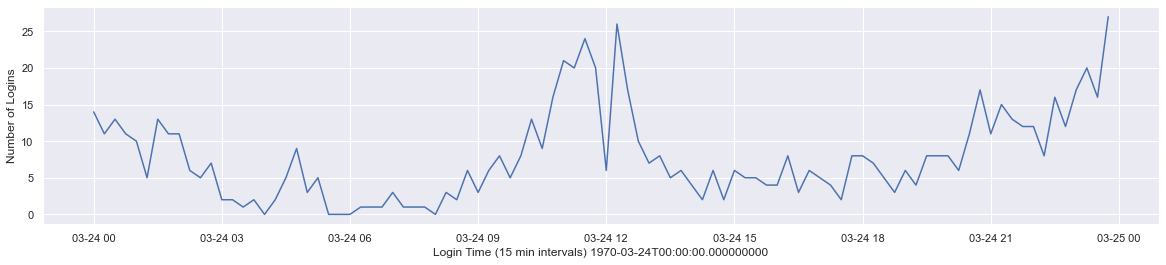

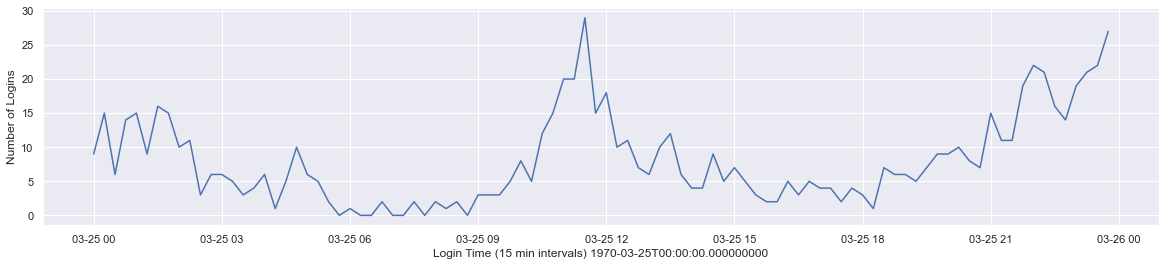

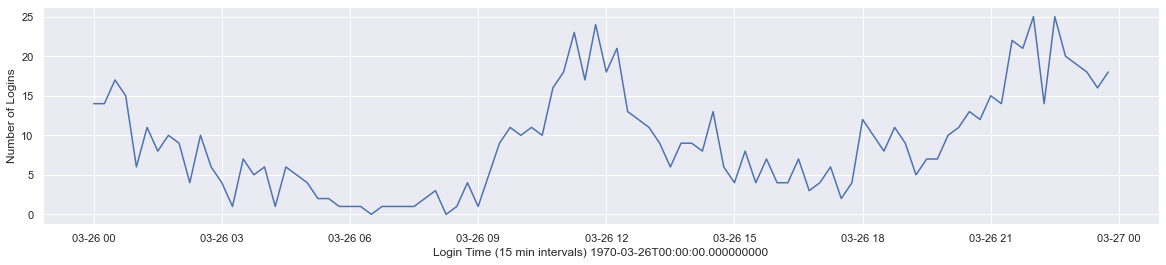

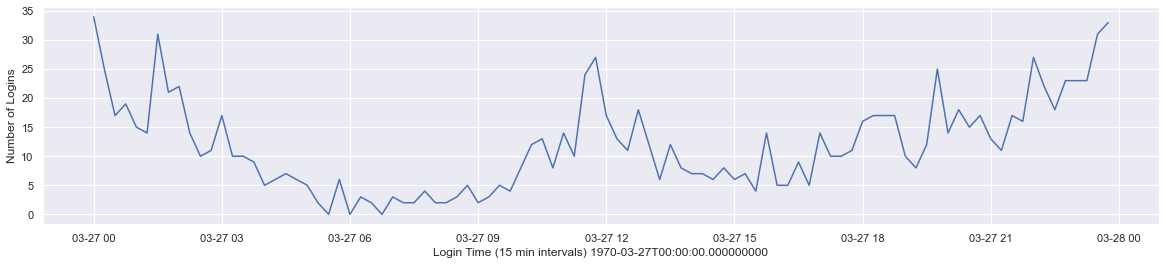

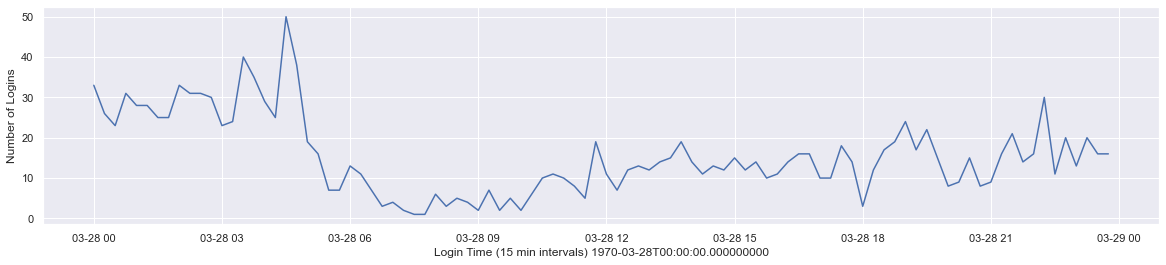

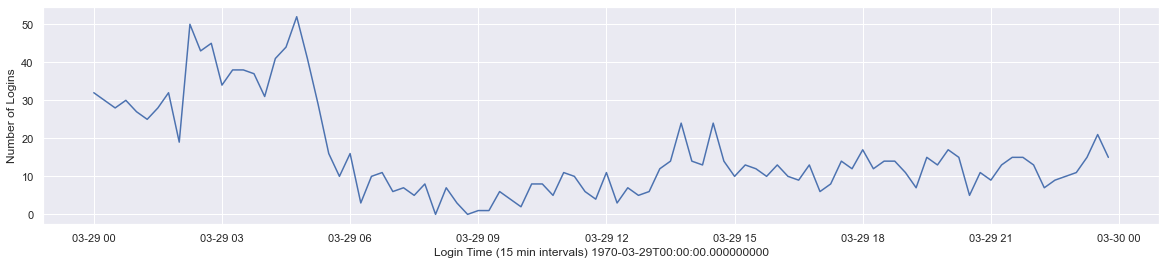

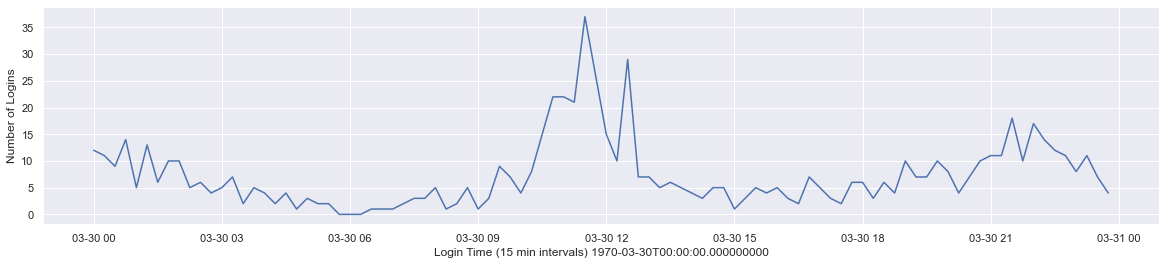

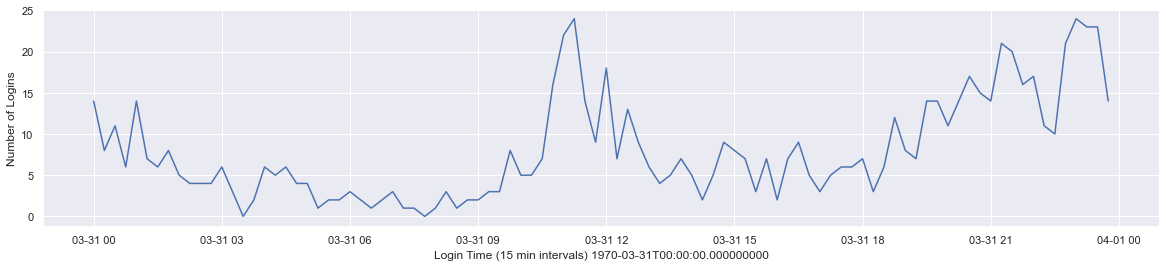

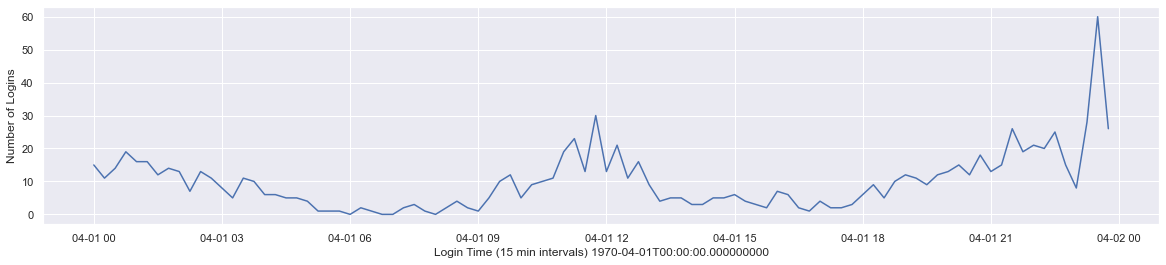

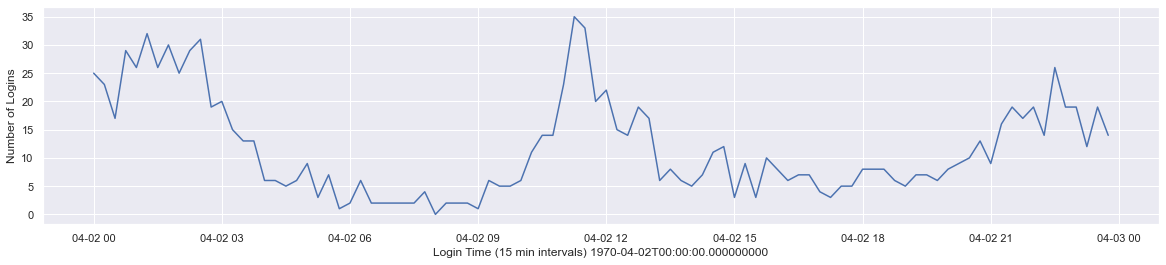

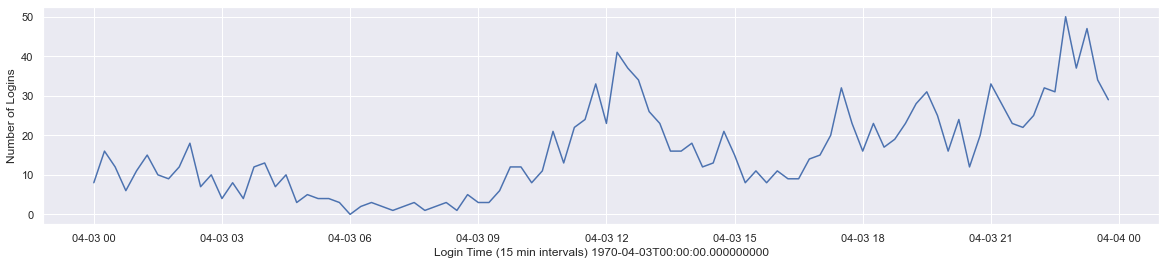

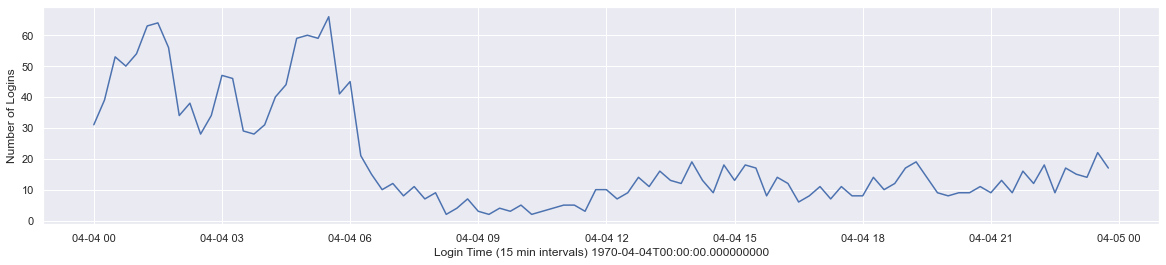

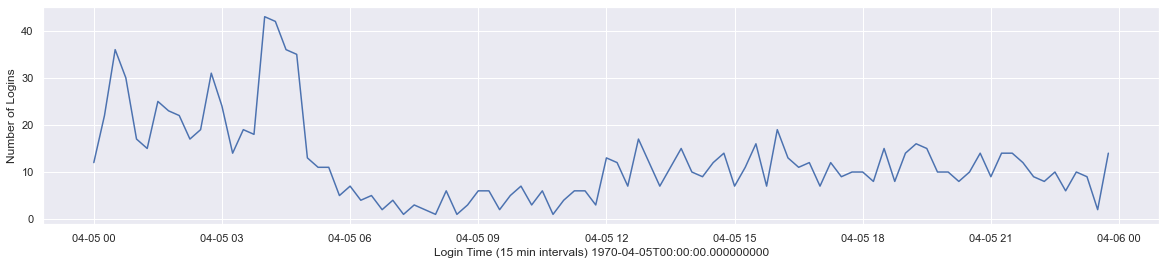

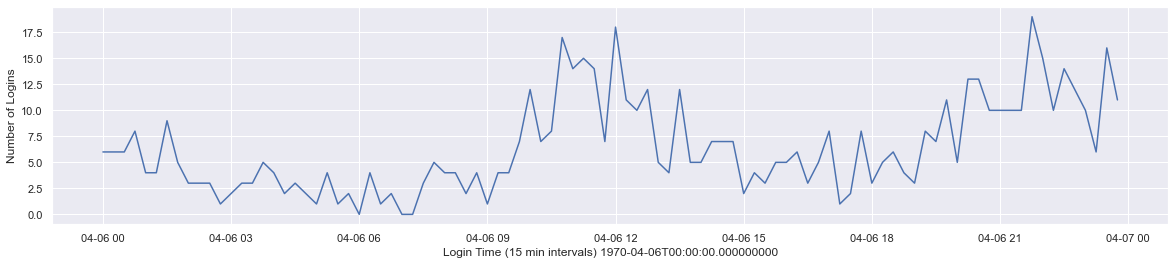

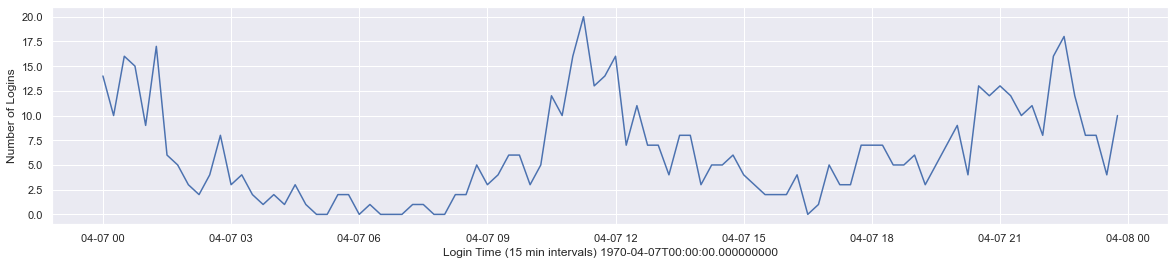

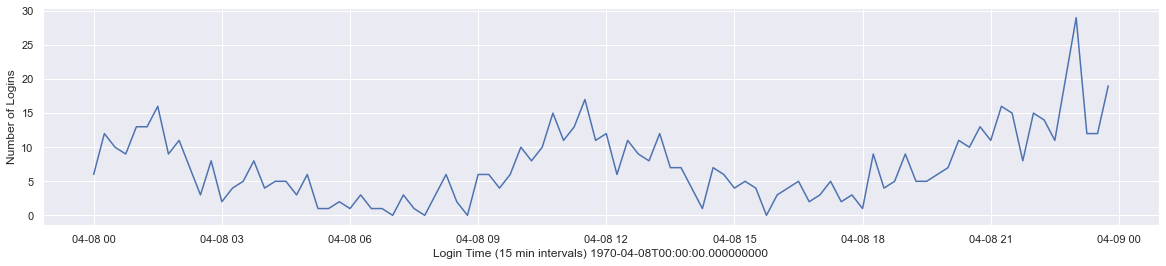

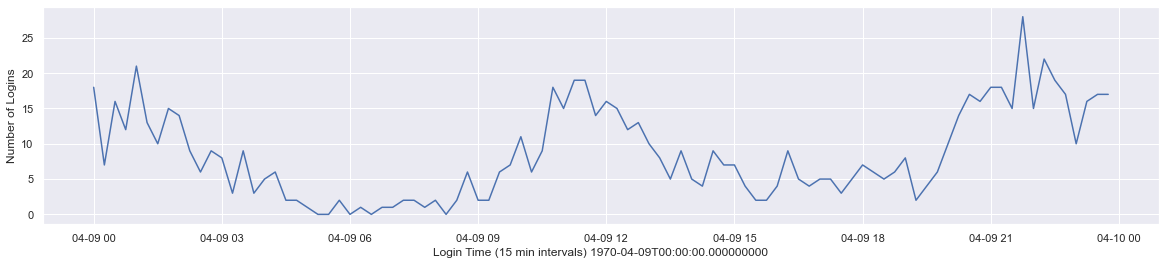

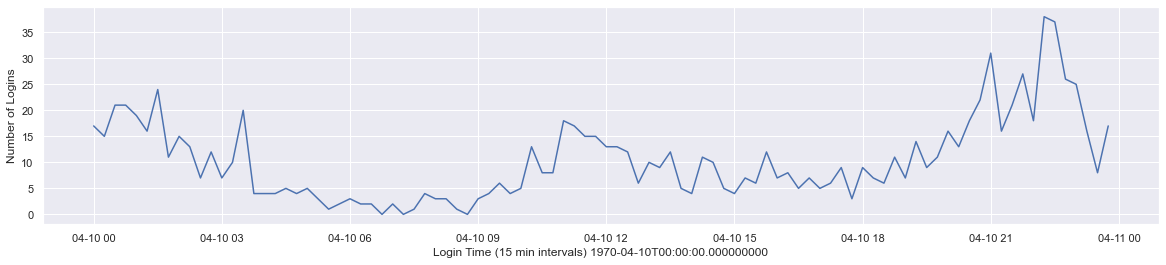

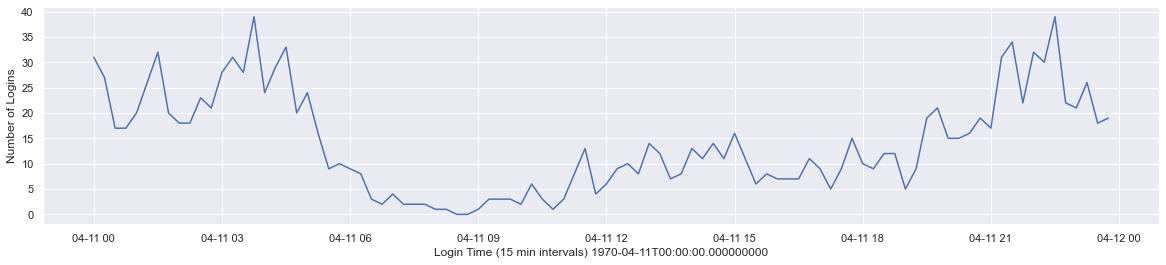

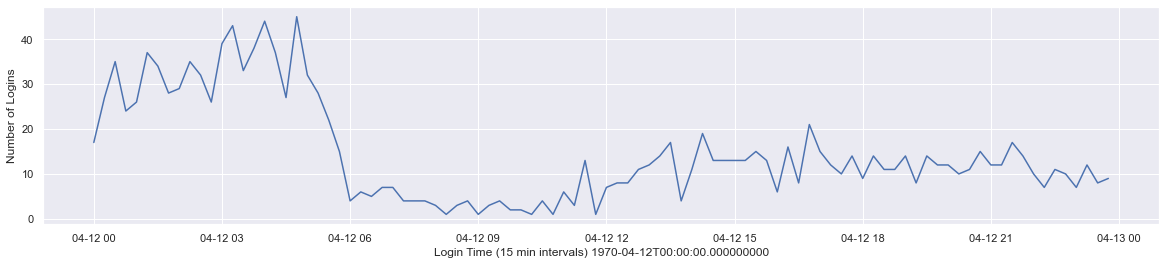

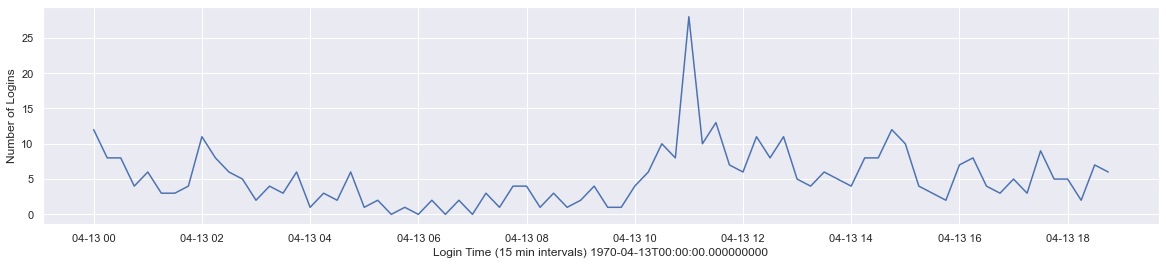

In [128]:
for date in unique_days:
    temp_df = df_merged.loc[df_merged['day'] == date, ['login_time', 'agg_count']]
    temp_df.reset_index()
    # temp_df.drop('index', axis= 1, inplace=True)
    temp_df = temp_df.set_index("login_time")
    #plot the graph
    _ = plt.figure(figsize=(20, 4))
    _ = plt.plot(temp_df)
    _ = plt.xlabel(f"Login Time (15 min intervals) {date.astype(str)}")
    _ = plt.ylabel("Number of Logins")
    plt.show()

Interesting it does appear that there is on a granular level that every 12 hours approximately that there is a surge of logins usually at midnight and 12pm. Kind of interesting, I'm curious as to what event causes that perhaps people in different timezones attend the same event broadcasted at a reasonable time for their audience.

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would start with a baseline metric of taking the current driving partner engagement regarding serving both cities and set the goal if we can increase this engagement by 10%. Based on the revenue generated by the truck drivers going between cities, 10% increase in engagement can have potentially significant upside to Ultimate in general (minus the negligible toll expenses).


2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.  Please provide details on:
    
    a) how you will implement the experiment

    b) what statistical test(s) you will conduct to verify the significance of the observation
    
    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

(90 day experiement):
I would probably split the Gotham and Metropolis drivers into two groups

1) Ones that pay for the tolls - control
2) Ones that don't for the tolls - experiment

(50/50 split of the two if possible)

(There would be four groups among the two cities in total)

Based on the data (I'm assuming there is a number that keeps track of the trips made to each city respectively)
After informing the group the experiement group of this change I would track the engagement of the drivers with the incentive
compared to the ones without the incentive and see if there is any difference (obvious would be to look at the numbers next is to run a t-test between the two groups)

I think there would be several stats tests to run for these experiments:

1) T-test between groups that were incentivized and not incentivized

2) T-test between enagements during the week-day and weekend

    -Incentivized versus non incentivized Same city worker
  
    -Weekend Metropolis and Gotham (control)
  
    -Weekend Metropolis and Gotham (experiement)
  
    -Weekday Daytime Metropolis and Gotham (control)
  
    -Weekday Daytime Metropolis and Gotham (experiment)
  
    -Weekday Nighttime Metropolis and Gotham (control)
  
    -Weekday Time Metropolis and Gotham (experiment)

3) Based on the results of these tests in order for us to reach our goal of 10% engagement from our drivers we will see what schedule time works best for our drivers from both cities and in order to cut costs we will only incentivize those who travel at the most optimal times decided from our experiements.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [3]:
df = pd.read_json("ultimate_data_challenge.json")
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [4]:
df.shape

(50000, 12)

In [5]:
df.describe()

trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.000000     33.300000      2.420000              4.700000  
50%        0.000000     66.700000      3.880000              5.000000  
75%        8.600000    100.000000      6.940000              5.000000  
max      100.000000    100.000000    160.960000              5.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
df.isna().sum().sort_values(ascending=False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
dtype: int64

In [8]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [9]:
import math

Answer to question 1)

In [10]:
retained_riders = df.loc[df['trips_in_first_30_days'] >= 1].shape[0]
total = df.shape[0]
retained_percentage = math.floor(retained_riders/total * 100)
print(f"The percentage of retained riders for Ultmate ride platform is {retained_percentage}%")

The percentage of retained riders for Ultmate ride platform is 69%


## Expolartory Data Analysis

Let's look at the data to see if we can get any insights into the model objective

In [11]:
df.describe()

trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.000000     33.300000      2.420000              4.700000  
50%        0.000000     66.700000      3.880000              5.000000  
75%        8.600000    100.000000      6.940000              5.000000  
max      100.000000    100.000000    160.960000              5.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Since we are curious about the retention rate for this platform I'm curious to see if there is any correlation to the retention rate and the city they are in

In [13]:
#Look at the different city types
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [14]:
def is_retained(attr):
    return 1 if attr > 0 else 0

df['is_rider_retained'] = df['trips_in_first_30_days'].apply(is_retained)

df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  is_rider_retained  
0         46.2      3.67                   5.0                  1  
1         50.0      8.26                   5.0                  0  
2        100.0      0.77                   5.0                  1  
3         80.0      2.36                   4.9                  1  
4         82.4      3.13                   4.9                  1

In [15]:
df_retained = df[['city', 'is_rider_retained']]
df_retained.head()

city  is_rider_retained
0  King's Landing                  1
1         Astapor                  0
2         Astapor                  1
3  King's Landing                  1
4      Winterfell                  1

In [16]:
df_city_group = df_retained.groupby(by=['city']).agg({"is_rider_retained": "sum"}).reset_index()

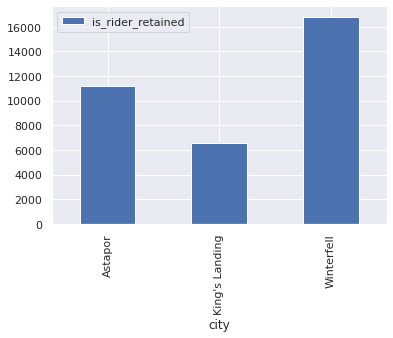

In [17]:
ax = df_city_group.plot.bar(x='city', y='is_rider_retained')

Interesting most of the riders retained are out of Winterfell, perhaps a better picture is percentage of the riders retained versus count.

In [18]:
df_city_group = df_retained.groupby(by=['city']).agg(rider_sum=("is_rider_retained", "sum"), rider_count=("is_rider_retained", "count")).reset_index()
df_city_group['city_retained_percentage'] = df_city_group['rider_sum']/df_city_group['rider_count']
df_city_group

city  rider_sum  rider_count  city_retained_percentage
0         Astapor      11201        16534                  0.677453
1  King's Landing       6598        10130                  0.651333
2      Winterfell      16811        23336                  0.720389

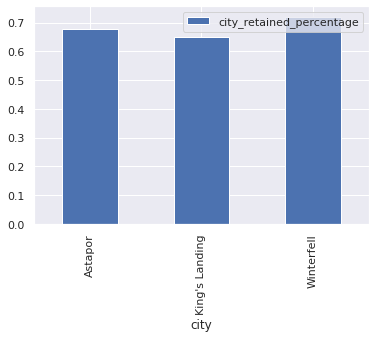

In [19]:
ax = df_city_group.plot.bar(x='city', y='city_retained_percentage')

Ok that gives us a better picture even though Winterfell has significantly more riders than the other cities, still the city with the greatest percentage of retained riders goes to Winterfell as well. I wonder what is it about Winterfell that causes this. Could the quality of drivers be better in comparison to the cities? Let's check that out.

In [20]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'is_rider_retained'],
      dtype='object')

In [21]:
df_city_group = df.groupby(by=['city']).agg(rider_sum=("is_rider_retained", "sum"), rider_count=("is_rider_retained", "count"), avg_driver_rating=("avg_rating_of_driver", "mean"), avg_rider_rating=("avg_rating_by_driver", "mean")).reset_index()

In [22]:
df_city_group

city  rider_sum  rider_count  avg_driver_rating  avg_rider_rating
0         Astapor      11201        16534           4.630593          4.798853
1  King's Landing       6598        10130           4.706997          4.853162
2      Winterfell      16811        23336           4.532996          4.730909

In [23]:
df_city_group.head()

city  rider_sum  rider_count  avg_driver_rating  avg_rider_rating
0         Astapor      11201        16534           4.630593          4.798853
1  King's Landing       6598        10130           4.706997          4.853162
2      Winterfell      16811        23336           4.532996          4.730909

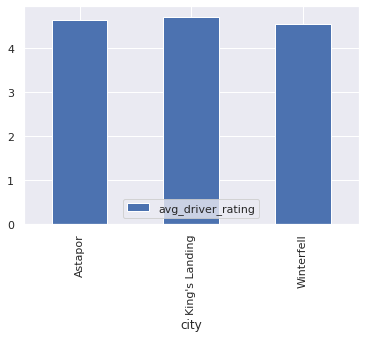

In [24]:
ax = df_city_group.plot.bar(x='city', y='avg_driver_rating')

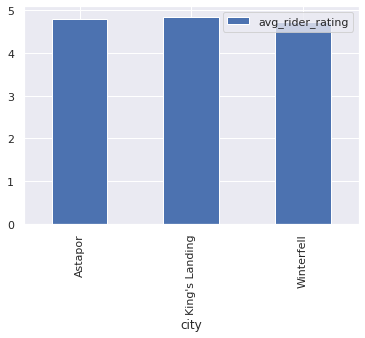

In [25]:
ax = df_city_group.plot.bar(x='city', y='avg_rider_rating')

Interesting... It appears that even though Winterfell has the highest user retention it appears that in regards to rating from both the driver and rider's perspective it comes in dead last (not by much however). That is interesting perhaps rating doesn't hold as much weight when it comes to determining rider retention let's continue looking into the data to see if we can discern any other patterns.

<AxesSubplot:>

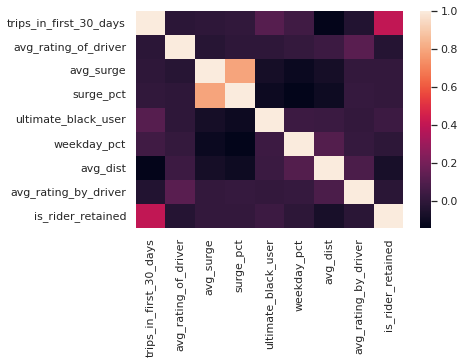

In [26]:
sns.heatmap(df.corr(method='pearson'))

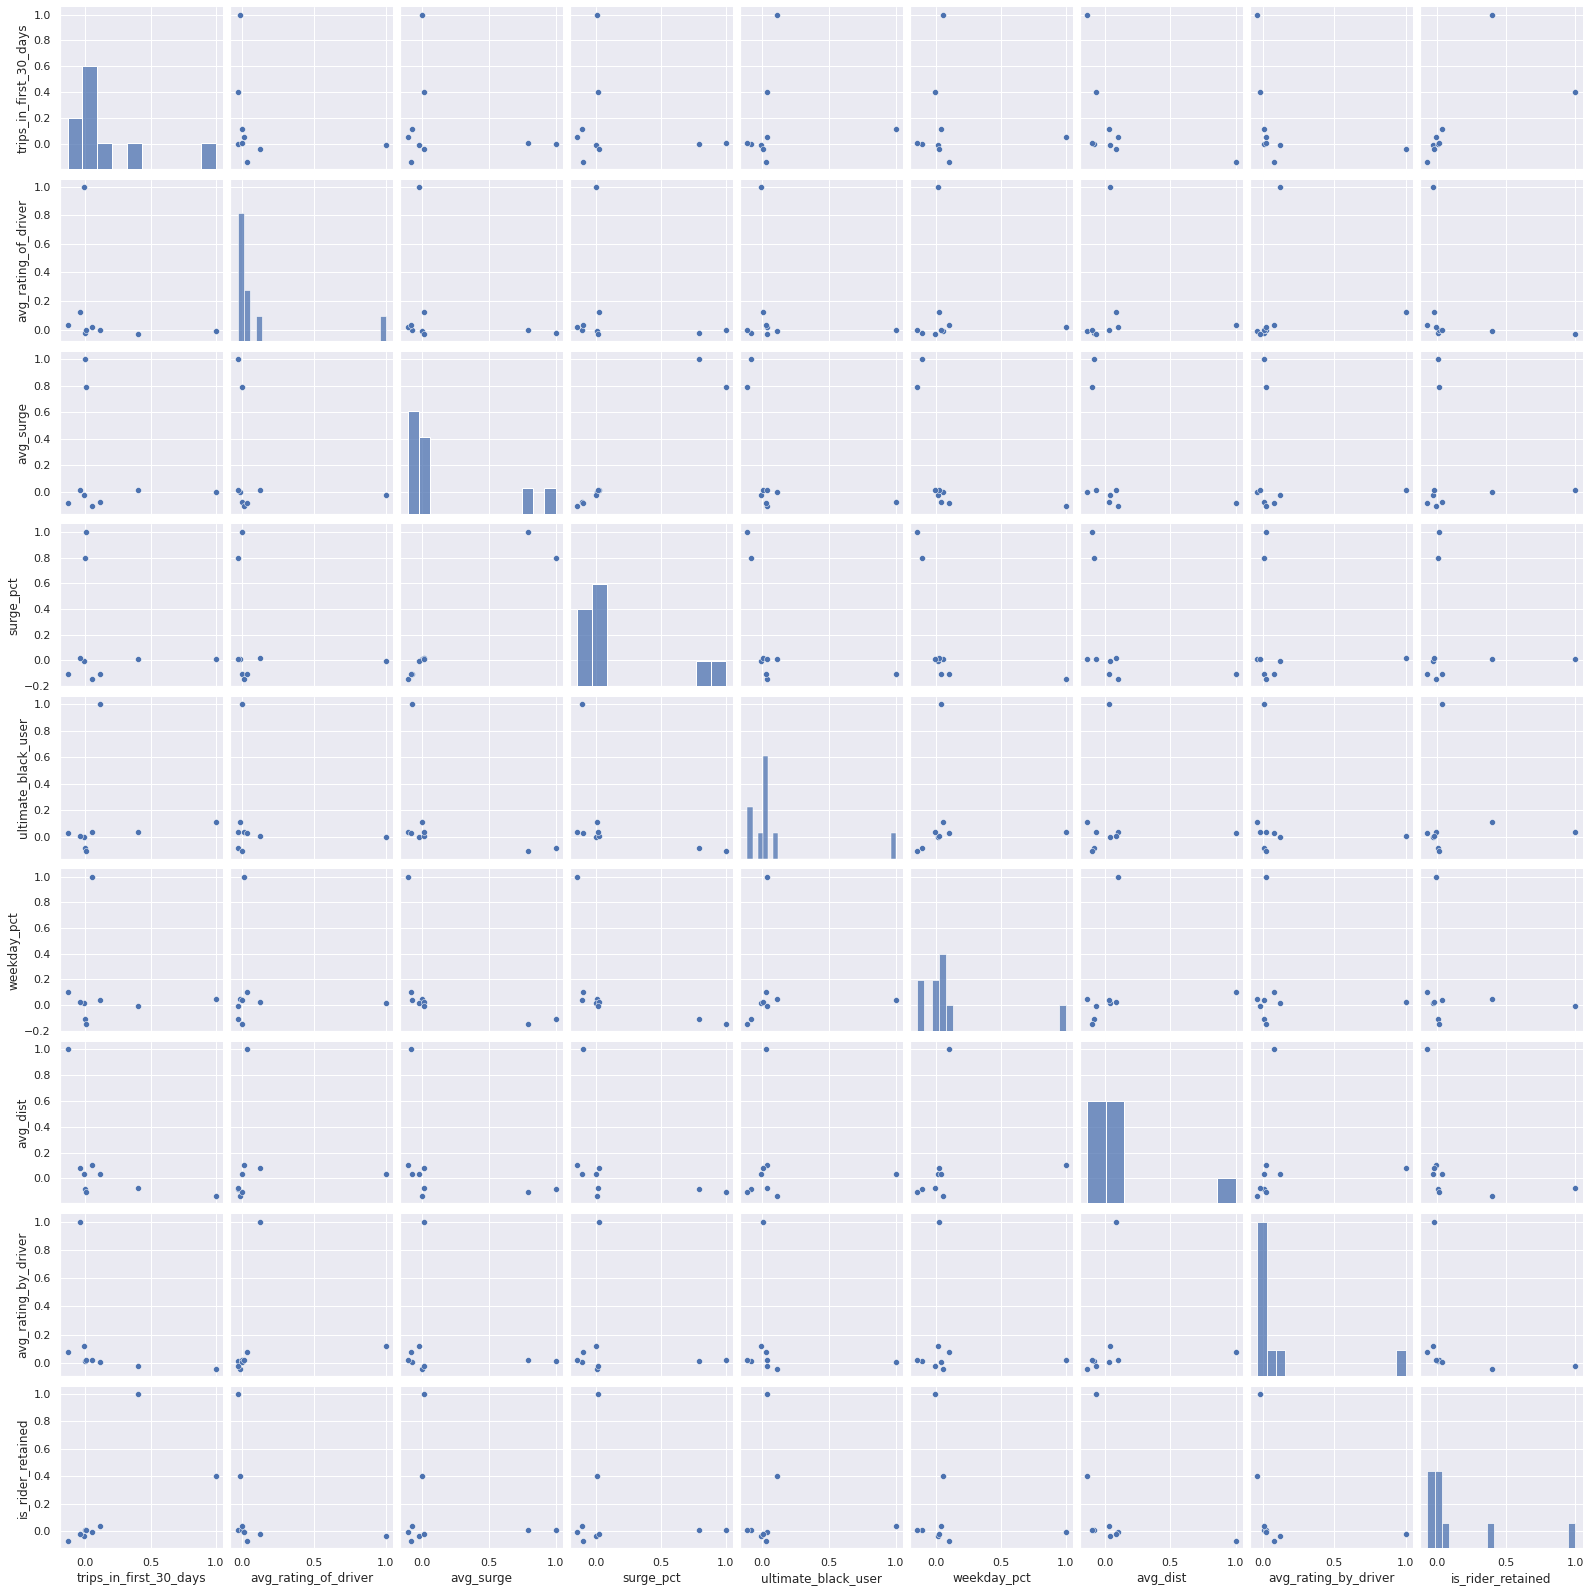

In [27]:
sns.pairplot(df.corr(method='pearson'))

There are definitely some interesting correlations between our target variable but nothing really stands out. Let's go back to the city view and see what in Wintfell gives it an advantage over the other cities regarding rider retention.

In [28]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  is_rider_retained  
0         46.2      3.67                   5.0                  1  
1         50.0      8.26                   5.0                  0  
2        100.0      0.77                   5.0                  1  
3         80.0      2.36                   4.9                  1  
4         82.4      3.13                   4.9                  1

In [29]:
#Let's do a little feature engineering and conver the ultimate_black_user field to a binary boolean field of 0/1 versus True/False
df['ultimate_black_user_bool'] = df['ultimate_black_user'].apply(lambda x: 1 if x == True else 0)
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  is_rider_retained  \
0         46.2      3.67                   5.0                  1   
1         50.0      8.26                   5.0                  0   
2        100.0      0.77                   5.0                  1   
3         80.0      2.36                   4.9                  1   
4         82.4      3.13                   4.9                  1   

   ultimate_black_user_bool  
0                         1  
1                         0  
2                         0  
3                         1  
4                         0

In [30]:
df.dtypes

city                         object
trips_in_first_30_days        int64
signup_date                  object
avg_rating_of_driver        float64
avg_surge                   float64
last_trip_date               object
phone                        object
surge_pct                   float64
ultimate_black_user            bool
weekday_pct                 float64
avg_dist                    float64
avg_rating_by_driver        float64
is_rider_retained             int64
ultimate_black_user_bool      int64
dtype: object

In [31]:
df_city_group = df.groupby(by=['city']).agg(rider_sum=("is_rider_retained", "sum"), rider_count=("is_rider_retained", "count"), avg_driver_rating=("avg_rating_of_driver", "mean"), avg_rider_rating=("avg_rating_by_driver", "mean"), avg_distance=("avg_dist", "mean"), black_user_sum=("ultimate_black_user_bool", "sum"), weekday_pct_avg=("weekday_pct", "mean"), surge_pct_avg=("surge_pct", "mean"), avg_surge=("avg_surge", "mean")).reset_index()

In [32]:
df_city_group.head()

city  rider_sum  rider_count  avg_driver_rating  \
0         Astapor      11201        16534           4.630593   
1  King's Landing       6598        10130           4.706997   
2      Winterfell      16811        23336           4.532996   

   avg_rider_rating  avg_distance  black_user_sum  weekday_pct_avg  \
0          4.798853      5.427940            6477        60.370050   
1          4.853162      5.976596            4206        63.232290   
2          4.730909      5.980153            8171        60.318936   

   surge_pct_avg  avg_surge  
0      10.140305   1.086522  
1       9.966979   1.070707  
2       7.449927   1.068194

In [33]:
df_city_group['black_user_percentage'] = df_city_group['black_user_sum'] / df_city_group['rider_count']

In [34]:
df_city_group.head()

city  rider_sum  rider_count  avg_driver_rating  \
0         Astapor      11201        16534           4.630593   
1  King's Landing       6598        10130           4.706997   
2      Winterfell      16811        23336           4.532996   

   avg_rider_rating  avg_distance  black_user_sum  weekday_pct_avg  \
0          4.798853      5.427940            6477        60.370050   
1          4.853162      5.976596            4206        63.232290   
2          4.730909      5.980153            8171        60.318936   

   surge_pct_avg  avg_surge  black_user_percentage  
0      10.140305   1.086522               0.391738  
1       9.966979   1.070707               0.415202  
2       7.449927   1.068194               0.350146

Another interesting view, it appears that with the highest retention rate for riders Winterfell also has the highest average distance per rider. In theory the data is saying that based on the length of the ride determines whether or not the rider was retained. Let's see if we can apply that theory to the other cities and see if that holds up.

### But Wait...

I think perhaps we can get a clearer picture of the data if we identify the missing datapoints and outliers first and then look at the data again to see if we get the same results

In [35]:
df.shape

(50000, 14)

In [36]:
df.isna().sum().sort_values(ascending=False)

avg_rating_of_driver        8122
phone                        396
avg_rating_by_driver         201
city                           0
trips_in_first_30_days         0
signup_date                    0
avg_surge                      0
last_trip_date                 0
surge_pct                      0
ultimate_black_user            0
weekday_pct                    0
avg_dist                       0
is_rider_retained              0
ultimate_black_user_bool       0
dtype: int64

Interesting I'm curious as to which cities have the majority of the missing values for average rating of driver, phone and average rating by driver

In [37]:
df_missing_values = df.groupby(by=['city'])['avg_rating_of_driver', 'phone', 'avg_rating_by_driver'].apply(lambda x: x.isnull().sum())

/tmp/ipykernel_571643/1957471688.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_missing_values = df.groupby(by=['city'])['avg_rating_of_driver', 'phone', 'avg_rating_by_driver'].apply(lambda x: x.isnull().sum())


In [38]:
df_missing_values.head()

avg_rating_of_driver  phone  avg_rating_by_driver
city                                                             
Astapor                         2887    121                    58
King's Landing                  1283     64                    40
Winterfell                      3952    211                   103

This looks to be about the correct amount of missing data in porportion to each city. The next question is what are we going to do about these missing fields. I would like to apply median then mean to the data for missing values for the average rating of driver based on the city. However, the missing phone data and rider rating can be omitted since it makes up roughly ~1% of the data. Let's go ahead and do that. As an aside I do find it interesting that the drivers have less nulls in their ratings for passengers than passengers do for their drivers. I would think riders would be more eager to rate their experience.

In [39]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [40]:
df_cleanup = df.dropna(subset=['phone', 'avg_rating_by_driver'])

Next let's apply the mean to the missing values for each avg_rating of driver based on city.

In [41]:
df_cleanup.isna().sum().sort_values(ascending=False)

avg_rating_of_driver        7961
city                           0
trips_in_first_30_days         0
signup_date                    0
avg_surge                      0
last_trip_date                 0
phone                          0
surge_pct                      0
ultimate_black_user            0
weekday_pct                    0
avg_dist                       0
avg_rating_by_driver           0
is_rider_retained              0
ultimate_black_user_bool       0
dtype: int64

In [42]:
city_mean_driver_rating = dict()
city_list = list(df_cleanup['city'].unique())
city_mean_driver_rating = {city: df_cleanup.loc[df_cleanup['city'] == city, 'avg_rating_of_driver'].mean() for city in city_list}
for city in city_list:
    city_driver_mean = city_mean_driver_rating[city]
    df_cleanup.loc[df_cleanup['city'] == city, 'avg_rating_of_driver'] = df_cleanup.loc[df_cleanup['city'] == city, 'avg_rating_of_driver'].fillna(city_driver_mean)

In [43]:
df_cleanup.isna().sum().sort_values(ascending=False)

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                       0
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
is_rider_retained           0
ultimate_black_user_bool    0
dtype: int64

With the missing values taken care of let's now look at the data grouped by city and see if there has been any changes

In [44]:
df_city_group = df_cleanup.groupby(by=['city']).agg(rider_sum=("is_rider_retained", "sum"), rider_count=("is_rider_retained", "count"), avg_driver_rating=("avg_rating_of_driver", "mean"), avg_rider_rating=("avg_rating_by_driver", "mean"), avg_distance=("avg_dist", "mean"), black_user_sum=("ultimate_black_user_bool", "sum"), weekday_pct_avg=("weekday_pct", "mean"), surge_pct_avg=("surge_pct", "mean"), avg_surge=("avg_surge", "mean")).reset_index()

In [45]:
df_city_group['black_user_percentage'] = df_city_group['black_user_sum'] / df_city_group['rider_count']
df_city_group['rider_retained_percentage'] = df_city_group['rider_sum'] / df_city_group['rider_count']

In [46]:
df_city_group

city  rider_sum  rider_count  avg_driver_rating  \
0         Astapor      11065        16355           4.630883   
1  King's Landing       6541        10027           4.707943   
2      Winterfell      16581        23024           4.532514   

   avg_rider_rating  avg_distance  black_user_sum  weekday_pct_avg  \
0          4.798740      5.413241            6398        60.383039   
1          4.852877      5.960741            4160        63.201346   
2          4.730360      5.970368            8021        60.293481   

   surge_pct_avg  avg_surge  black_user_percentage  rider_retained_percentage  
0      10.132742   1.086268               0.391195                   0.676552  
1       9.929072   1.070251               0.414880                   0.652339  
2       7.461979   1.068241               0.348376                   0.720162

Okay, nothing has really changed we still have the same leaders in the various categories. The next step is identifying the outliers and seeing if we can eliminate them and see if these numbers chagne afterwards.

In [47]:
df_cleanup.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'is_rider_retained',
       'ultimate_black_user_bool'],
      dtype='object')

In [48]:
#Select columns for box plot comparisons
compare_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

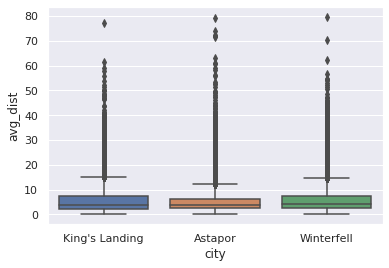

In [49]:
ax = sns.boxplot(x='city', y='avg_dist', data=df_cleanup)

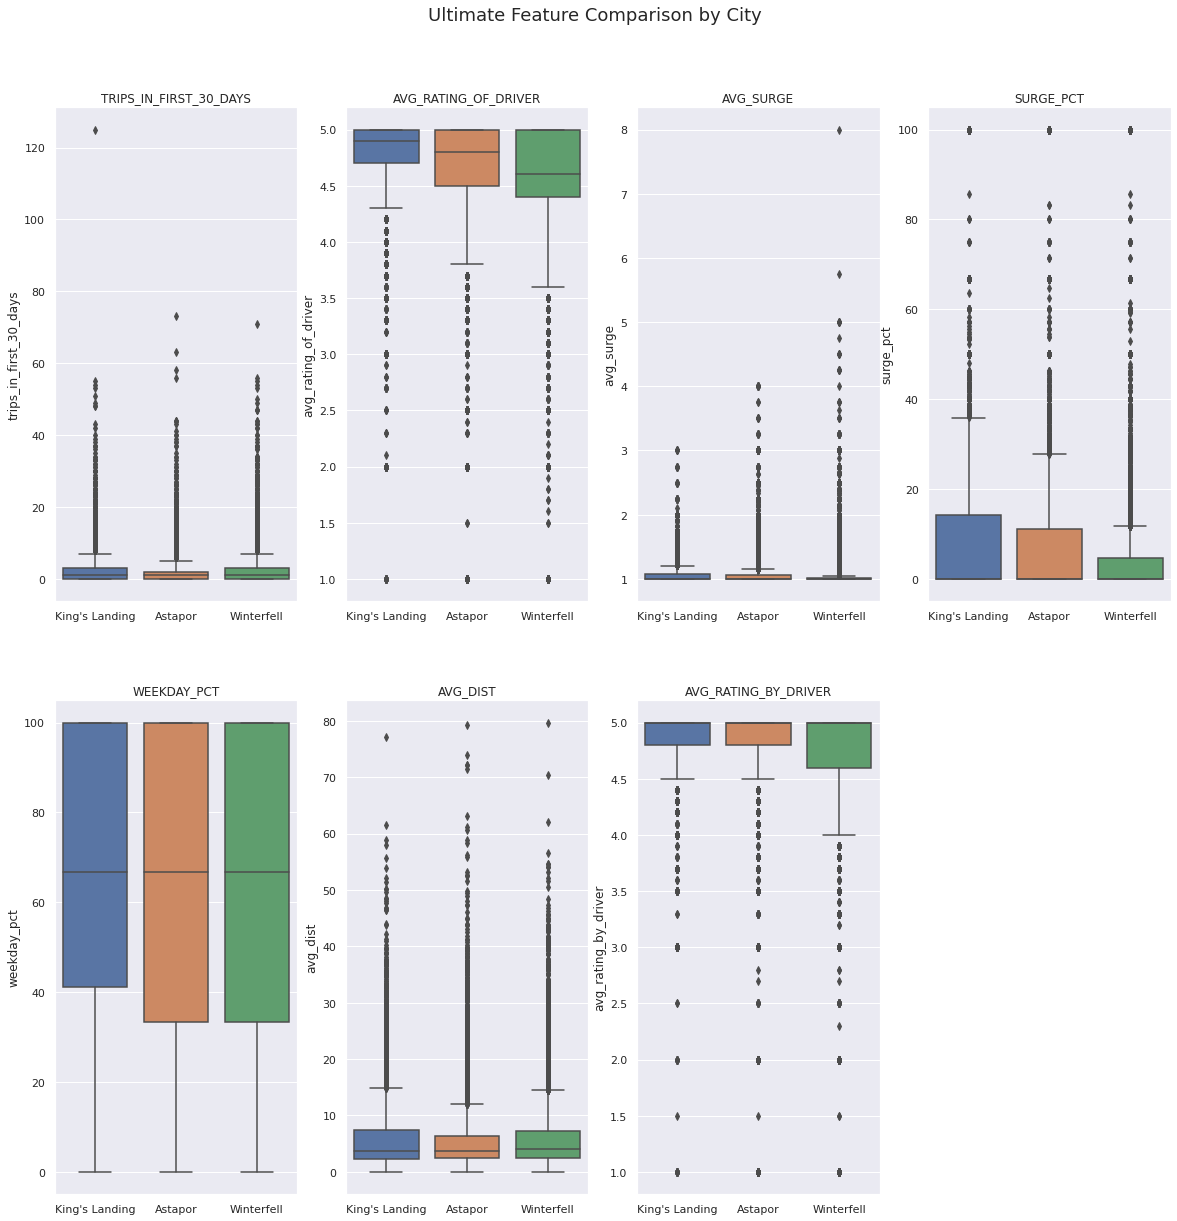

In [50]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Ultimate Feature Comparison by City", fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 4
# calculate number of rows
nrows = len(compare_cols) // ncols + (len(compare_cols) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, feature in enumerate(compare_cols):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.boxplot(ax=ax, x='city', y=feature, data=df_cleanup)

    # chart formatting
    ax.set_title(feature.upper())
    ax.set_xlabel("")



Average surge and trips within the first 30 days seems to have obvious outliers in the data. Let's see if we can get a better picture of what those guys look like

<AxesSubplot:>

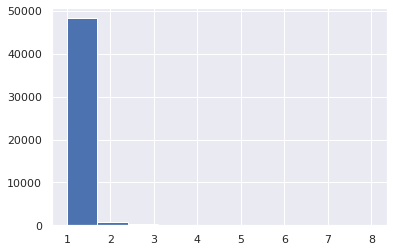

In [51]:
df_cleanup['avg_surge'].hist()

In [52]:
df_cleanup['avg_surge'].describe()

count    49406.000000
mean         1.074617
std          0.221009
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

<AxesSubplot:>

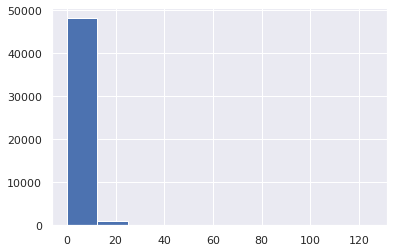

In [53]:
df_cleanup['trips_in_first_30_days'].hist()

In [54]:
df_cleanup['trips_in_first_30_days'].describe()

count    49406.000000
mean         2.284176
std          3.799164
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

Woah that is definitely a discrepancy there for both fields. Perhaps for the surge multiplier there was some rare instances where someone was in need of a ride during rush hour when demand was high, but I'm willing to bet that this is far few in between as illustrated in the histogram. Same with the trips in the first 30 days. Someone having 125 trips in 30 days sounds off or just has a lot of money to spare. In either case we should eliminate these records that are offset this egregiously.

In [55]:
df_cleanup.shape

(49406, 14)

In [56]:
df_cleanup.loc[df_cleanup['avg_surge'] >= 2].shape

(710, 14)

<AxesSubplot:>

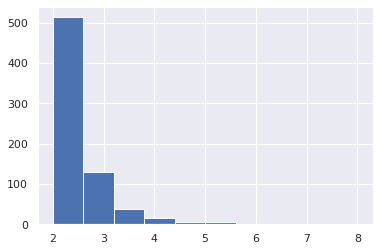

In [57]:
df_cleanup.loc[df_cleanup['avg_surge'] >= 2, 'avg_surge'].hist()

In this case we will eliminate records that have avg_surge greater than or equal to 2 since that once again only makes up about ~1.5%

In [58]:
df_cleanup = df_cleanup[df_cleanup['avg_surge'] < 2]
df_cleanup.loc[df_cleanup['avg_surge'] >= 2].shape

(0, 14)

In [59]:
df_cleanup.shape

(48696, 14)

<AxesSubplot:>

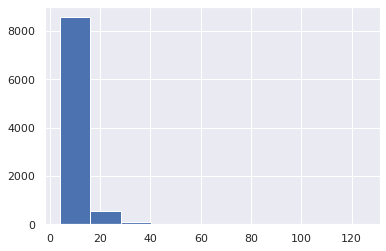

In [60]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] > 3, 'trips_in_first_30_days'].hist()

In [61]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] > 3, 'trips_in_first_30_days'].shape

(9243,)

In [62]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] > 3, 'trips_in_first_30_days'].describe()

count    9243.000000
mean        7.902845
std         5.852093
min         4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max       125.000000
Name: trips_in_first_30_days, dtype: float64

There is a significant amount of users that have had 3 or more rides within the first 30 days (which is expected) let's look at how many of them have had 10 or more rides in the first 30 days.

<AxesSubplot:>

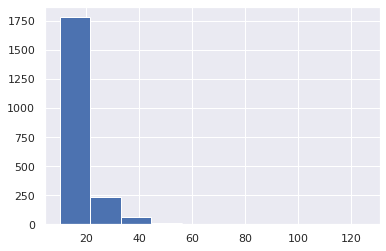

In [63]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] >= 10, 'trips_in_first_30_days'].hist()

In [64]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] >= 10, 'trips_in_first_30_days'].shape

(2099,)

In [65]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] >= 10, 'trips_in_first_30_days'].describe()

count    2099.000000
mean       15.951882
std         7.654732
min        10.000000
25%        11.000000
50%        14.000000
75%        18.000000
max       125.000000
Name: trips_in_first_30_days, dtype: float64

2100 records is a lot to part with given the number of records we have let's up the filter to be about 20 or more, and fine tune if needed.

<AxesSubplot:>

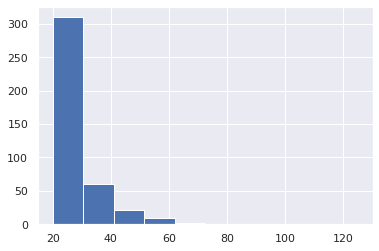

In [66]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] >= 20, 'trips_in_first_30_days'].hist()

In [67]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] >= 20, 'trips_in_first_30_days'].shape

(405,)

In [68]:
df_cleanup.loc[df_cleanup['trips_in_first_30_days'] >= 20, 'trips_in_first_30_days'].describe()

count    405.000000
mean      27.854321
std        9.871502
min       20.000000
25%       22.000000
50%       25.000000
75%       30.000000
max      125.000000
Name: trips_in_first_30_days, dtype: float64

20 Days looks like a good cutoff without loosing too much data let's go ahead and do that.

In [69]:
df_cleanup = df_cleanup.loc[df_cleanup['trips_in_first_30_days'] < 20]

<AxesSubplot:>

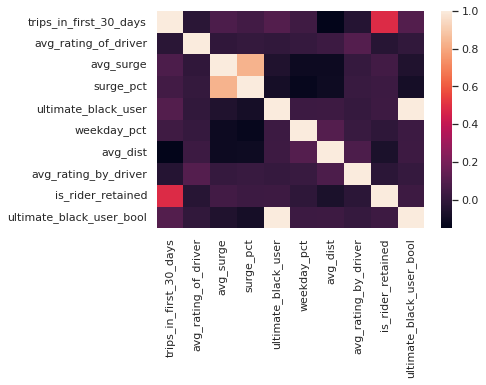

In [70]:
sns.heatmap(df_cleanup.corr(method='pearson'))

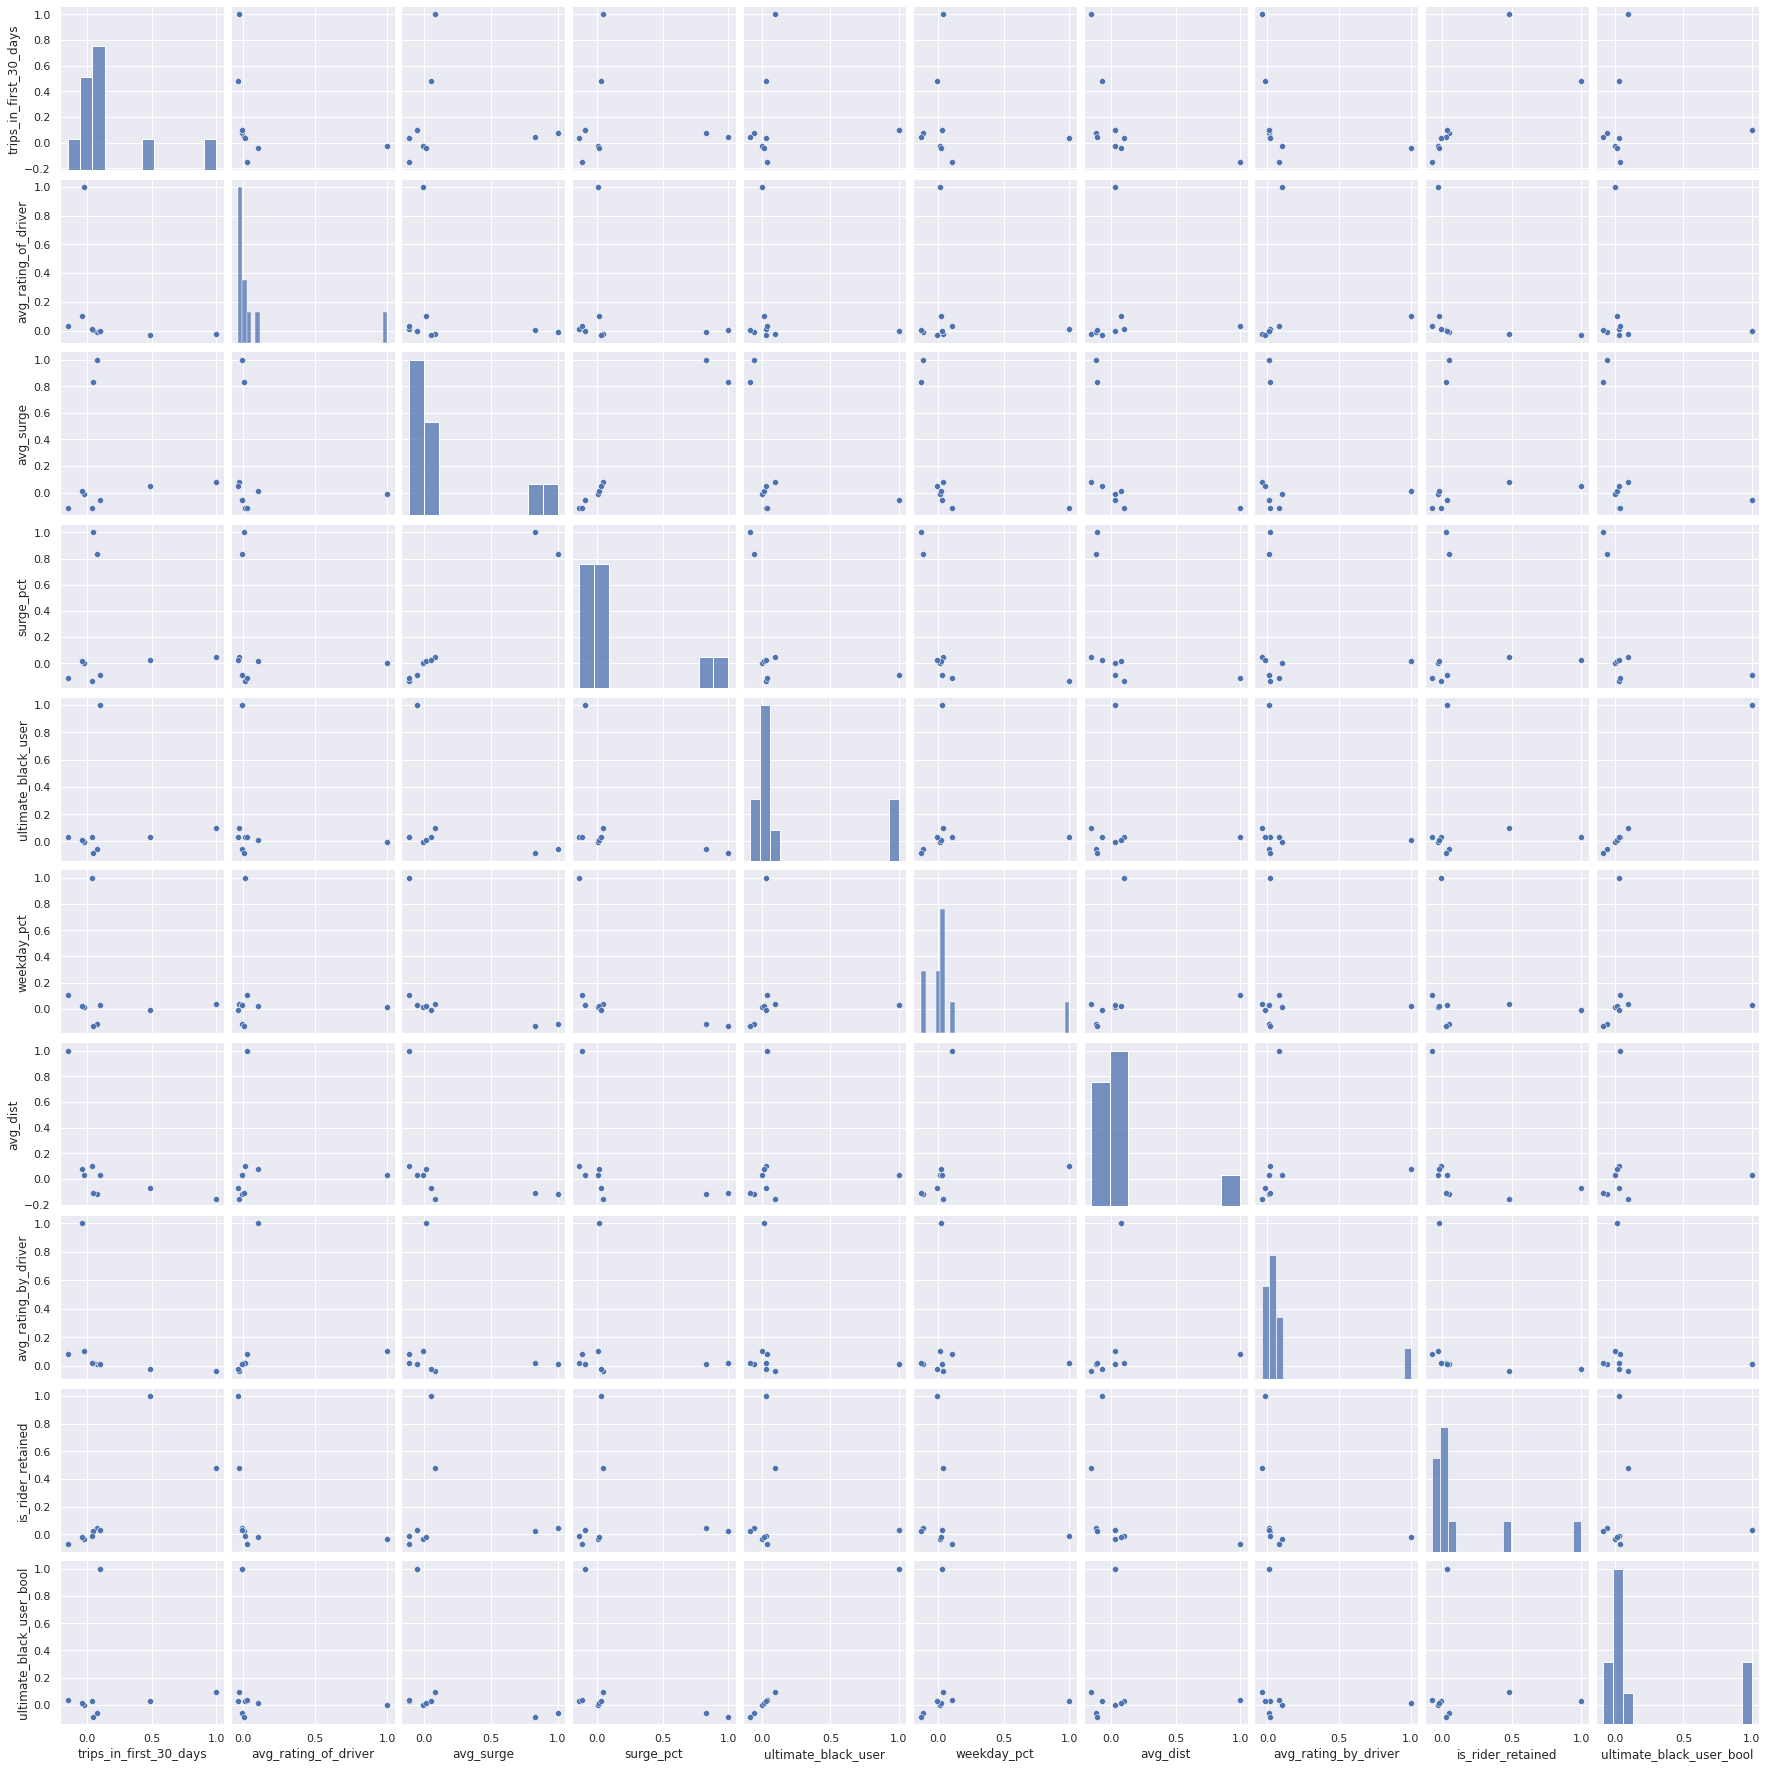

In [71]:
sns.pairplot(df_cleanup.corr(method='pearson'))

## Feature Engineering

Next let's make sure we have all our features in numeric form.

In [72]:
df_cleanup.dtypes

city                         object
trips_in_first_30_days        int64
signup_date                  object
avg_rating_of_driver        float64
avg_surge                   float64
last_trip_date               object
phone                        object
surge_pct                   float64
ultimate_black_user            bool
weekday_pct                 float64
avg_dist                    float64
avg_rating_by_driver        float64
is_rider_retained             int64
ultimate_black_user_bool      int64
dtype: object

I think the fields (trips in first 30 days and last trip date) can be omitted because of the following:

-Trip in first 30 days - was used to derive our target variable and would be redundant to keep

-Last trip date - would also be redundant espeically if the date lies within the 30 day timeframe that we are trying to use as indicator of whether the user was retained.

In [73]:
df_cleanup = df_cleanup.loc[:, ~df_cleanup.columns.isin(['trips_in_first_30_days', 'last_trip_date'])]
df_cleanup.columns

Index(['city', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'phone',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'is_rider_retained',
       'ultimate_black_user_bool'],
      dtype='object')

In [74]:
df_feature_engineer = df_cleanup
df_feature_engineer.head()

city signup_date  avg_rating_of_driver  avg_surge    phone  \
0  King's Landing  2014-01-25                   4.7       1.10   iPhone   
1         Astapor  2014-01-29                   5.0       1.00  Android   
2         Astapor  2014-01-06                   4.3       1.00   iPhone   
3  King's Landing  2014-01-10                   4.6       1.14   iPhone   
4      Winterfell  2014-01-27                   4.4       1.19  Android   

   surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0       15.4                 True         46.2      3.67   
1        0.0                False         50.0      8.26   
2        0.0                False        100.0      0.77   
3       20.0                 True         80.0      2.36   
4       11.8                False         82.4      3.13   

   avg_rating_by_driver  is_rider_retained  ultimate_black_user_bool  
0                   5.0                  1                         1  
1                   5.0                  0                         0  
2                   5.0                  1                         0  
3                   4.9                  1                         1  
4                   4.9                  1                         0

In [75]:
#Convert datestring to timestamp
def _convert_to_timestamp(attr):
    return pd.Timestamp(attr).timestamp()
df_feature_engineer['signup_timestamp'] = df['signup_date'].apply(_convert_to_timestamp)
df_feature_engineer.drop(columns=['signup_date'], axis=1, inplace=True)
df_feature_engineer.columns

Index(['city', 'avg_rating_of_driver', 'avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'is_rider_retained', 'ultimate_black_user_bool',
       'signup_timestamp'],
      dtype='object')

In [76]:
df_feature_engineer.head()

city  avg_rating_of_driver  avg_surge    phone  surge_pct  \
0  King's Landing                   4.7       1.10   iPhone       15.4   
1         Astapor                   5.0       1.00  Android        0.0   
2         Astapor                   4.3       1.00   iPhone        0.0   
3  King's Landing                   4.6       1.14   iPhone       20.0   
4      Winterfell                   4.4       1.19  Android       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                 True         46.2      3.67                   5.0   
1                False         50.0      8.26                   5.0   
2                False        100.0      0.77                   5.0   
3                 True         80.0      2.36                   4.9   
4                False         82.4      3.13                   4.9   

   is_rider_retained  ultimate_black_user_bool  signup_timestamp  
0                  1                         1      1.390608e+09  
1                  0                         0      1.390954e+09  
2                  1                         0      1.388966e+09  
3                  1                         1      1.389312e+09  
4                  1                         0      1.390781e+09

In [77]:
#Convert phone to binary boolean field (is_iphone)
def _convert_phone_to_bool(attr):
    return 1 if attr == 'iPhone' else 0
df_feature_engineer['is_iphone'] = df_feature_engineer['phone'].apply(_convert_phone_to_bool)
df_feature_engineer.drop(columns=['phone'], axis=1, inplace=True)
df_feature_engineer.head()

city  avg_rating_of_driver  avg_surge  surge_pct  \
0  King's Landing                   4.7       1.10       15.4   
1         Astapor                   5.0       1.00        0.0   
2         Astapor                   4.3       1.00        0.0   
3  King's Landing                   4.6       1.14       20.0   
4      Winterfell                   4.4       1.19       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                 True         46.2      3.67                   5.0   
1                False         50.0      8.26                   5.0   
2                False        100.0      0.77                   5.0   
3                 True         80.0      2.36                   4.9   
4                False         82.4      3.13                   4.9   

   is_rider_retained  ultimate_black_user_bool  signup_timestamp  is_iphone  
0                  1                         1      1.390608e+09          1  
1                  0                         0      1.390954e+09          0  
2                  1                         0      1.388966e+09          1  
3                  1                         1      1.389312e+09          1  
4                  1                         0      1.390781e+09          0

In [78]:
#Almost forgot to drop the redundant field of ultimate_black_user because we already have the field ultimate_black_user_bool
df_feature_engineer.drop(columns=['ultimate_black_user'], axis=1, inplace=True)
df_feature_engineer.head()

city  avg_rating_of_driver  avg_surge  surge_pct  weekday_pct  \
0  King's Landing                   4.7       1.10       15.4         46.2   
1         Astapor                   5.0       1.00        0.0         50.0   
2         Astapor                   4.3       1.00        0.0        100.0   
3  King's Landing                   4.6       1.14       20.0         80.0   
4      Winterfell                   4.4       1.19       11.8         82.4   

   avg_dist  avg_rating_by_driver  is_rider_retained  \
0      3.67                   5.0                  1   
1      8.26                   5.0                  0   
2      0.77                   5.0                  1   
3      2.36                   4.9                  1   
4      3.13                   4.9                  1   

   ultimate_black_user_bool  signup_timestamp  is_iphone  
0                         1      1.390608e+09          1  
1                         0      1.390954e+09          0  
2                         0      1.388966e+09          1  
3                         1      1.389312e+09          1  
4                         0      1.390781e+09          0

In [79]:
#Conver the city into one hot encoding for dataframe
df_dummy = pd.get_dummies(df_feature_engineer)
df_dummy.head()

avg_rating_of_driver  avg_surge  surge_pct  weekday_pct  avg_dist  \
0                   4.7       1.10       15.4         46.2      3.67   
1                   5.0       1.00        0.0         50.0      8.26   
2                   4.3       1.00        0.0        100.0      0.77   
3                   4.6       1.14       20.0         80.0      2.36   
4                   4.4       1.19       11.8         82.4      3.13   

   avg_rating_by_driver  is_rider_retained  ultimate_black_user_bool  \
0                   5.0                  1                         1   
1                   5.0                  0                         0   
2                   5.0                  1                         0   
3                   4.9                  1                         1   
4                   4.9                  1                         0   

   signup_timestamp  is_iphone  city_Astapor  city_King's Landing  \
0      1.390608e+09          1             0                    1   
1      1.390954e+09          0             1                    0   
2      1.388966e+09          1             1                    0   
3      1.389312e+09          1             0                    1   
4      1.390781e+09          0             0                    0   

   city_Winterfell  
0                0  
1                0  
2                0  
3                0  
4                1

In [80]:
df_dummy.dtypes

avg_rating_of_driver        float64
avg_surge                   float64
surge_pct                   float64
weekday_pct                 float64
avg_dist                    float64
avg_rating_by_driver        float64
is_rider_retained             int64
ultimate_black_user_bool      int64
signup_timestamp            float64
is_iphone                     int64
city_Astapor                  uint8
city_King's Landing           uint8
city_Winterfell               uint8
dtype: object

Fantastic! We have the data in a format that will be easy to train our model on. The next step is the normalization of the data, but before we do that we must create our test and training sets because its going to require us to train our normalizer and we don't want to overfit our normalizer on both train and test. These values need to be imputed for when we use this and we'll do that when constructing our ml pipeline.

## Modeling

Now we are on to the modeling portion of this excercise and seeing what we can do to optmize our model's accuracy. For our base model accuracy we will be using a logistic regression on the data we have, no normalization just basic X, Y training data split and see what are accuracy is and go from there.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_dummy.loc[:, ~df_dummy.columns.isin(['is_rider_retained'])].values, 
                                              (df_dummy[['is_rider_retained']]).values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.6898865236478091


/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great we have our baseline but now let's see what we can do to optimize and improve our accuracy

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [83]:
pipe_lr = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression),
    LogisticRegression()
)

In [84]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [85]:
#Add hyper-params
grid_params = {'logisticregression__C': [0.01, 0.1, 1, 10, 100], 'selectkbest__k': np.arange(0, Xlr.shape[1])*1+1}
grid_lr = GridSearchCV(pipe_lr, param_grid=grid_params, cv=5, n_jobs=-1, scoring='accuracy')

In [86]:
X, y = df_dummy.loc[:, ~df_dummy.columns.isin(['is_rider_retained'])].values, df_dummy[['is_rider_retained']].values

In [87]:
grid_lr.fit(X, y)

/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-pack

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f047c182ef0>)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'selectkbest__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
             scoring='accuracy')

In [88]:
print(grid_lr.best_score_)

0.6903977978750264


We had a marginal improvement on predicting user retention can we see improvements using a different model such as Random Forest?

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [91]:
rf_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [92]:
grid_params = {"randomforestclassifier__n_estimators": [10, 100, 1000]}
grid_rf = GridSearchCV(rf_pipe, cv=5, param_grid=grid_params, n_jobs=-1, scoring='accuracy')

In [93]:
grid_rf.fit(X, y)

/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/mgfos207/Desktop/Springboard/Module 26/capstone3/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/mgfos207/Desktop/Springbo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 100,
                                                                  1000]},
             scoring='accuracy')

In [94]:
print(grid_rf.best_score_)

0.6845789828256403


## Conclusion

We were able to get ~roughly 70% accuracy with our logistic regression with hyper-parameter optmization, this is a good start and definitely has room for improvement.

There are a some of observations in the data that could be useful for Ultimate to retain their customers.

1) As noticed in the EDA there seems to be a negative correlation to average distance and rider retention. A suggestion for keeping the rides a little shorter would perhaps boost people's likelihood of retention. Perhaps staying too long in the car with the driver can be a little taxing on the rider

2) Although we didn't use the trips in the first 30 days there is a positive correlation between the number of rides and whether the user was retained. A suggestion for this would be to incentivize people to get more rides with Ulitmate via notifications and perhaps a reward program to give a free ride after 'x' amount of trips taken within the first 30 days.

3) Winterfell has the highest retention rate out of all the three cities, there should be more data collected on the riders perhaps demographic information that can give us more insight into what exactly is causing this city to have the highest retention rate out of all three cities.

Overall, the results look promising and as we collect more data we can improve our predictive power in identifying which riders can be retained.